In [1]:
# dataset link https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset

# 📦 Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Deep learning libraries
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Dimensionality reduction and data-imbalanced
# %pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import joblib

# %pip install graphviz
from sklearn.tree import export_graphviz
import graphviz


import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "../datasets/UNSW/Training_and_Testing_Sets/UNSW_NB15_testing-set.csv"
df = pd.read_csv(file_path, low_memory=False)
df.shape

(82332, 45)

In [2]:
file_path = "../datasets/UNSW/UNSW-NB15.csv"
data = pd.read_csv(file_path, low_memory=False)
data.shape

(2540043, 49)

In [5]:
normal_data = data[data['Label'] == 1]
anomaly_data = data[data['Label'] == 0]

In [3]:
data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [6]:
unsw_feature_map = {
    'dsport': 'destination_port',
    'srcip': 'source_ip',
    'sport': 'source_port',
    'dstip': 'destination_ip',
    'proto': 'protocol',
    'state': 'connection_state',
    'dur': 'flow_duration',
    'sbytes': 'source_bytes',
    'dbytes': 'destination_bytes',
    'sttl': 'source_ttl',
    'dttl': 'destination_ttl',
    'service': 'application_service',
    'Sload': 'source_load',
    'Dload': 'destination_load',
    'Spkts': 'source_packets',
    'swin': 'source_window_size',
    'stcpb': 'source_tcp_base_sequence_number',
    'dtcpb': 'destination_tcp_base_sequence_number',
    'smeansz': 'source_mean_packet_size',
    'dmeansz': 'destination_mean_packet_size',
    'trans_depth': 'transaction_depth',
    'res_bdy_len': 'response_body_length',
    'Sjit': 'source_jitter',
    'Djit': 'destination_jitter',
    'Stime': 'start_time',
    'Sintpkt': 'source_interpacket_time',
    'tcprtt': 'tcp_round_trip_time',
    'is_sm_ips_ports': 'same_ip_and_ports',
    'ct_state_ttl': 'state_based_on_ttl',
    'ct_flw_http_mthd': 'http_method_count',
    'is_ftp_login': 'ftp_login_successful',
    'ct_srv_src': 'count_same_srv_src',
    'ct_srv_dst': 'count_same_srv_dst',
    'ct_dst_ltm': 'count_dst_last_2_minutes',
    'ct_src_ ltm': 'count_src_last_2_minutes',
    'ct_src_dport_ltm': 'count_src_dport_last_2_minutes',
    'ct_dst_src_ltm': 'count_dst_src_last_2_minutes'
}
data.rename(columns=unsw_feature_map, inplace=True)
data.columns

Index(['source_ip', 'source_port', 'destination_ip', 'destination_port',
       'protocol', 'connection_state', 'flow_duration', 'source_bytes',
       'destination_bytes', 'source_ttl', 'destination_ttl', 'sloss', 'dloss',
       'application_service', 'source_load', 'destination_load',
       'source_packets', 'Dpkts', 'source_window_size', 'dwin',
       'source_tcp_base_sequence_number',
       'destination_tcp_base_sequence_number', 'source_mean_packet_size',
       'destination_mean_packet_size', 'transaction_depth',
       'response_body_length', 'source_jitter', 'destination_jitter',
       'start_time', 'Ltime', 'source_interpacket_time', 'Dintpkt',
       'tcp_round_trip_time', 'synack', 'ackdat', 'same_ip_and_ports',
       'state_based_on_ttl', 'http_method_count', 'ftp_login_successful',
       'ct_ftp_cmd', 'count_same_srv_src', 'count_same_srv_dst',
       'count_dst_last_2_minutes', 'count_src_last_2_minutes',
       'count_src_dport_last_2_minutes', 'ct_dst_sport_ltm',

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   source_ip                             object 
 1   source_port                           object 
 2   destination_ip                        object 
 3   destination_port                      object 
 4   protocol                              object 
 5   connection_state                      object 
 6   flow_duration                         float64
 7   source_bytes                          int64  
 8   destination_bytes                     int64  
 9   source_ttl                            int64  
 10  destination_ttl                       int64  
 11  sloss                                 int64  
 12  dloss                                 int64  
 13  application_service                   object 
 14  source_load                           float64
 15  destination_loa

In [8]:
data.head(10)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
5,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,NaN,0
6,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0
7,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,0,6,7,3,1,1,1,1,NaN,0
8,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,...,0,6,7,2,1,1,1,1,NaN,0
9,10.40.170.2,0,10.40.170.2,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0


In [9]:
data.tail(10)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
2540033,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0
2540034,59.166.0.4,59563,149.171.126.2,80,tcp,CON,1.616038,1626,60216,31,...,,2,2,2,2,2,2,2,NaN,0
2540035,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,,1,1,4,2,2,2,2,NaN,0
2540036,59.166.0.9,61886,149.171.126.1,21,tcp,CON,3.108071,1148,1402,31,...,2,2,2,2,4,2,2,3,NaN,0
2540037,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,,2,1,4,2,2,2,2,NaN,0
2540038,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540039,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540040,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540041,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0
2540042,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,...,,1,1,2,4,2,2,2,Exploits,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
dur,2540043.0,6.587925e-01,1.392494e+01,0.000000e+00,1.037000e-03,1.586100e-02,2.145650e-01,8.786638e+03
sbytes,2540043.0,4.339589e+03,5.640604e+04,0.000000e+00,2.000000e+02,1.470000e+03,3.182000e+03,1.435577e+07
dbytes,2540043.0,3.642760e+04,1.610962e+05,0.000000e+00,1.780000e+02,1.820000e+03,1.489400e+04,1.465753e+07
sttl,2540043.0,6.278202e+01,7.462281e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2540043.0,3.076681e+01,4.285092e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2540043.0,5.163917e+00,2.251709e+01,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00,5.319000e+03
dloss,2540043.0,1.632944e+01,5.659479e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,5.507000e+03
Sload,2540043.0,3.695650e+07,1.186044e+08,0.000000e+00,1.353955e+05,5.893038e+05,2.039923e+06,5.988000e+09
Dload,2540043.0,2.450860e+06,4.224865e+06,0.000000e+00,1.191580e+04,5.893179e+05,2.925945e+06,1.287619e+08
Spkts,2540043.0,3.328882e+01,7.628393e+01,0.000000e+00,2.000000e+00,1.200000e+01,4.400000e+01,1.064600e+04


In [11]:
data['attack_cat'] = data['attack_cat'].str.strip()
data['attack_cat'] = data['attack_cat'].fillna('Normal Traffic')
data['attack_cat'].unique(), data['Label'].unique()

(array(['Normal Traffic', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
        'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis',
        'Backdoor'], dtype=object),
 array([0, 1]))

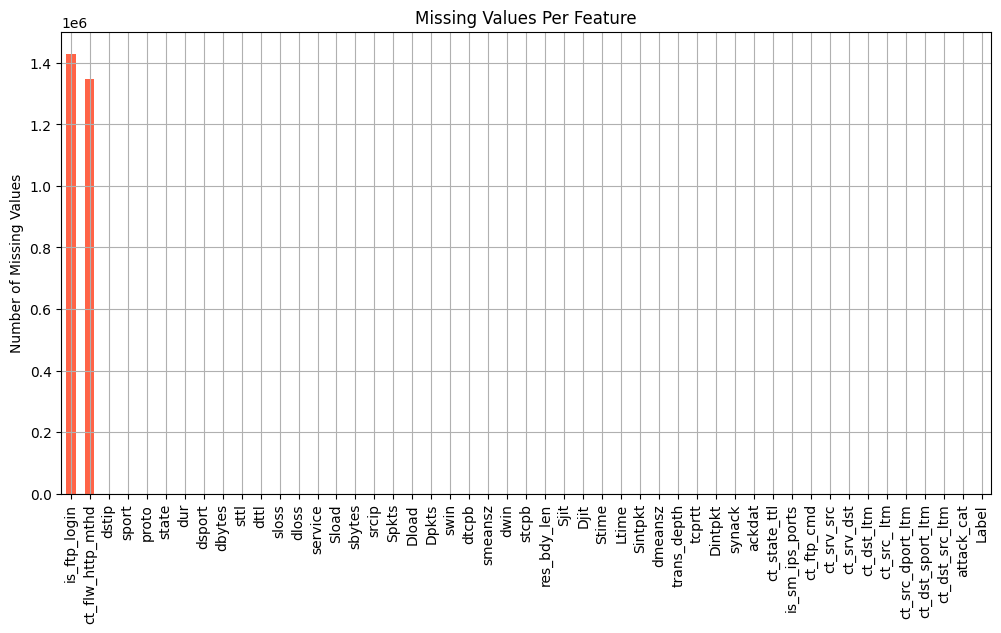

Column 'ct_flw_http_mthd' has missing values. 1348143 with float64 data_type
Column 'is_ftp_login' has missing values. 1429877 with float64 data_type


In [12]:
# Finding missing_values for all features

missing_values = data.isnull().sum()
cols_with_missing = []
missing_values.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='tomato')
plt.title("Missing Values Per Feature")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

for col in data.columns:
    if data[col].isnull().any():
        print(f"Column '{col}' has missing values. {data[col].isnull().sum()} with {data[col].dtype} data_type")
        cols_with_missing.append(col)

In [13]:
# Missing values treatment

if missing_values.any():
  print("Missing values found. Proceeding with imputation.")
  for col in cols_with_missing:
    if data[col].dtype == 'object':
      data[col] = data[col].fillna(data[col].mode()[0])
    else:
      data[col] = data[col].fillna(data[col].mean())
else:
     print("No missing values found.")

Missing values found. Proceeding with imputation.


In [14]:
# Check for duplicates for all dataset features

# duplicates = data[data.duplicated(keep=False)]
duplicates = data.iloc[:len(data)].duplicated(keep=False)
if not duplicates.empty:
    print(f"{duplicates.sum()} duplicate rows found on the dataset")
else:
    print("\nNo duplicates found.")
print(f"Current shape of the dataset: {data.shape}")

568837 duplicate rows found on the dataset
Current shape of the dataset: (2540043, 49)


In [15]:
# Remove duplicated rows if any

if duplicates.sum() > 0:
    print(f"Removing {duplicates.sum()} duplicated rows...")
    data.drop_duplicates(inplace=True)
    print(f"Current shape of the dataset: {data.shape}")

Removing 568837 duplicated rows...
Current shape of the dataset: (2059413, 49)


In [16]:
# Converting Some feature data types to appropriate one as it is relevant to convert

obj_to_int = ['ct_ftp_cmd', 'sport', 'dsport']
for col in obj_to_int:
    # Strip whitespace and replace blank strings with NaN
    data[col] = data[col].astype(str).str.strip().replace('', None)
    
    # Convert to numeric, coerce errors to NaN, then fill with 0 and convert to int
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)

In [17]:
# Renaming and dropping attributes (column features) if they exist

if ('Label' in data.columns) and  ('Attack Type' not in data.columns):
    data.drop('Label', axis=1, inplace=True)
    data['Attack Type'] = data['attack_cat']
    data.drop('attack_cat', axis=1, inplace=True)

In [18]:
grouped_labels = {
    'Normal Traffic': 'Normal Traffic',
    'Exploits': 'Exploits',
    'Shellcode': 'Exploits',
    'Backdoors': 'Exploits',
    'Backdoor': 'Exploits',  # merge duplicate
    'Reconnaissance': 'Reconnaissance',
    'Analysis': 'Reconnaissance',
    'DoS': 'DoS',
    'Generic': 'DoS/DDoS',
    'Fuzzers': 'Fuzzing',
    'Worms': 'Malware'
}

# Replace original labels
data['Attack Type'] = data['Attack Type'].replace(grouped_labels)

In [19]:
# Label encoding for categorical features

label_encoders = {}  # To store encoders for each column
for col in data.drop('Attack Type', axis=1).columns:
    if data[col].dtypes == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))  # Convert to string just in case
        label_encoders[col] = le  # Save encoder if you want to inverse transform later

In [20]:
# Data seperating/splitting to target and independent variables

X = data.drop('Attack Type', axis=1)
y = data['Attack Type']
z = pd.Series(np.where(data['Attack Type'] == "Normal Traffic", "Normal Traffic", "Attack"))
print(f"Unique Binary Classes {z.unique()}") 
print(f"Unique Multi Classes {y.unique()}")

Unique Binary Classes ['Normal Traffic' 'Attack']
Unique Multi Classes ['Normal Traffic' 'Exploits' 'Reconnaissance' 'DoS' 'DoS/DDoS' 'Fuzzing'
 'Malware']


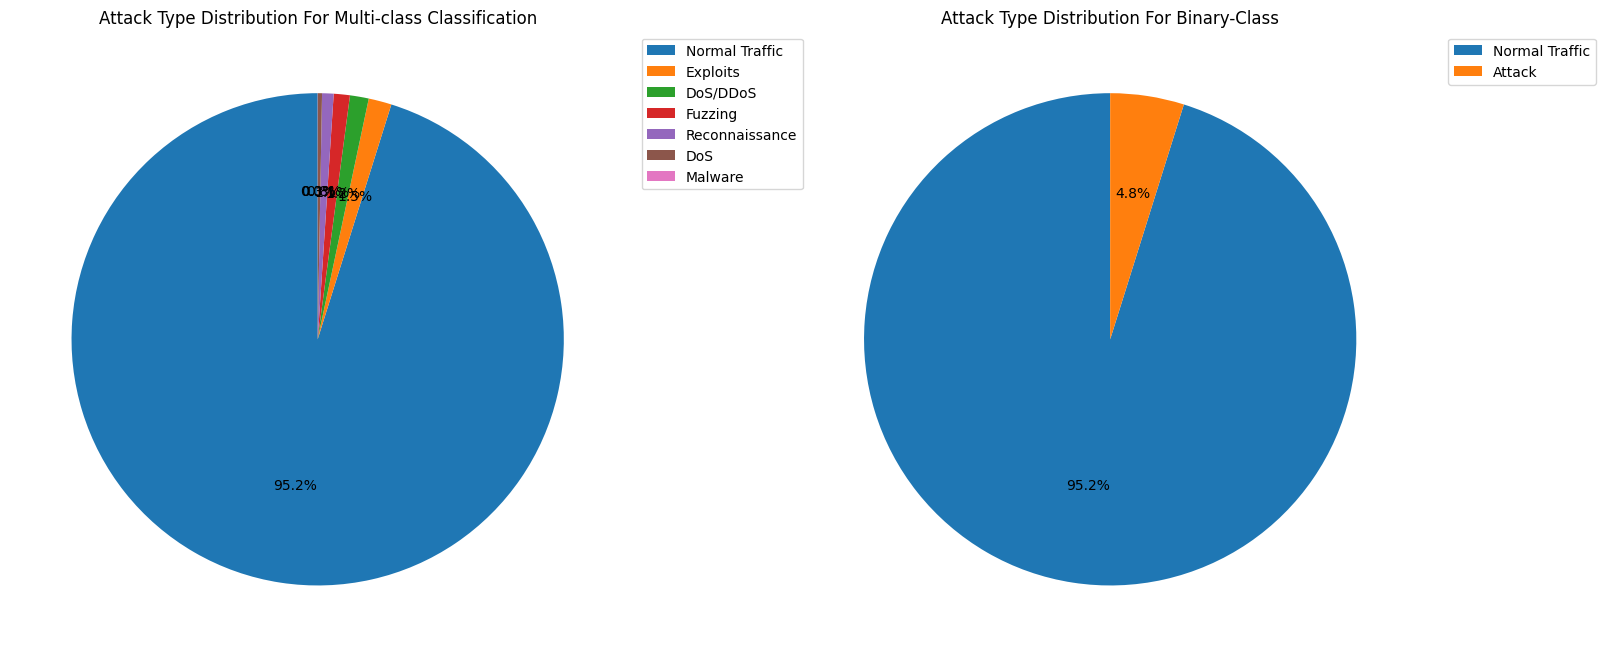

In [21]:
# Pie Chart (Attack Type Distribution)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Multi-class classification pie chart
axs[0].pie(data['Attack Type'].value_counts(), autopct='%1.1f%%', startangle=90)
axs[0].set_title('Attack Type Distribution For Multi-class Classification')
axs[0].legend(data['Attack Type'].value_counts().index, loc='upper right', bbox_to_anchor=(1.3, 1))

# Binary classification pie chart
axs[1].pie(z.value_counts(), autopct='%1.1f%%', startangle=90)
axs[1].set_title('Attack Type Distribution For Binary-Class')
axs[1].legend(z.value_counts().index, loc='upper right', bbox_to_anchor=(1.3, 1))

# Adjust layout to fit legends and titles properly
plt.tight_layout()
plt.show()

In [22]:
# Target variable class value counts

count_class0, count_class1 = z.value_counts()
print('Binary-class Attack Type:',count_class0, count_class1)

count_class0, count_class1, count_class2, count_class3, count_class4, count_class5, count_class6 = data['Attack Type'].value_counts()
print('Multi-class Attack Category:',count_class0, count_class1, count_class2, count_class3, count_class4, count_class5, count_class6)

Binary-class Attack Type: 1959770 99643
Multi-class Attack Category: 1959770 31093 25378 21795 15541 5665 171


In [23]:
dl = data.drop(['Attack Type', 'Ltime', 'dwin'], axis=1).copy()
dl.shape, data.shape

((2059413, 45), (2059413, 48))

In [24]:
label_encoder = LabelEncoder()
data['Attack Type'] = label_encoder.fit_transform(data['Attack Type'])

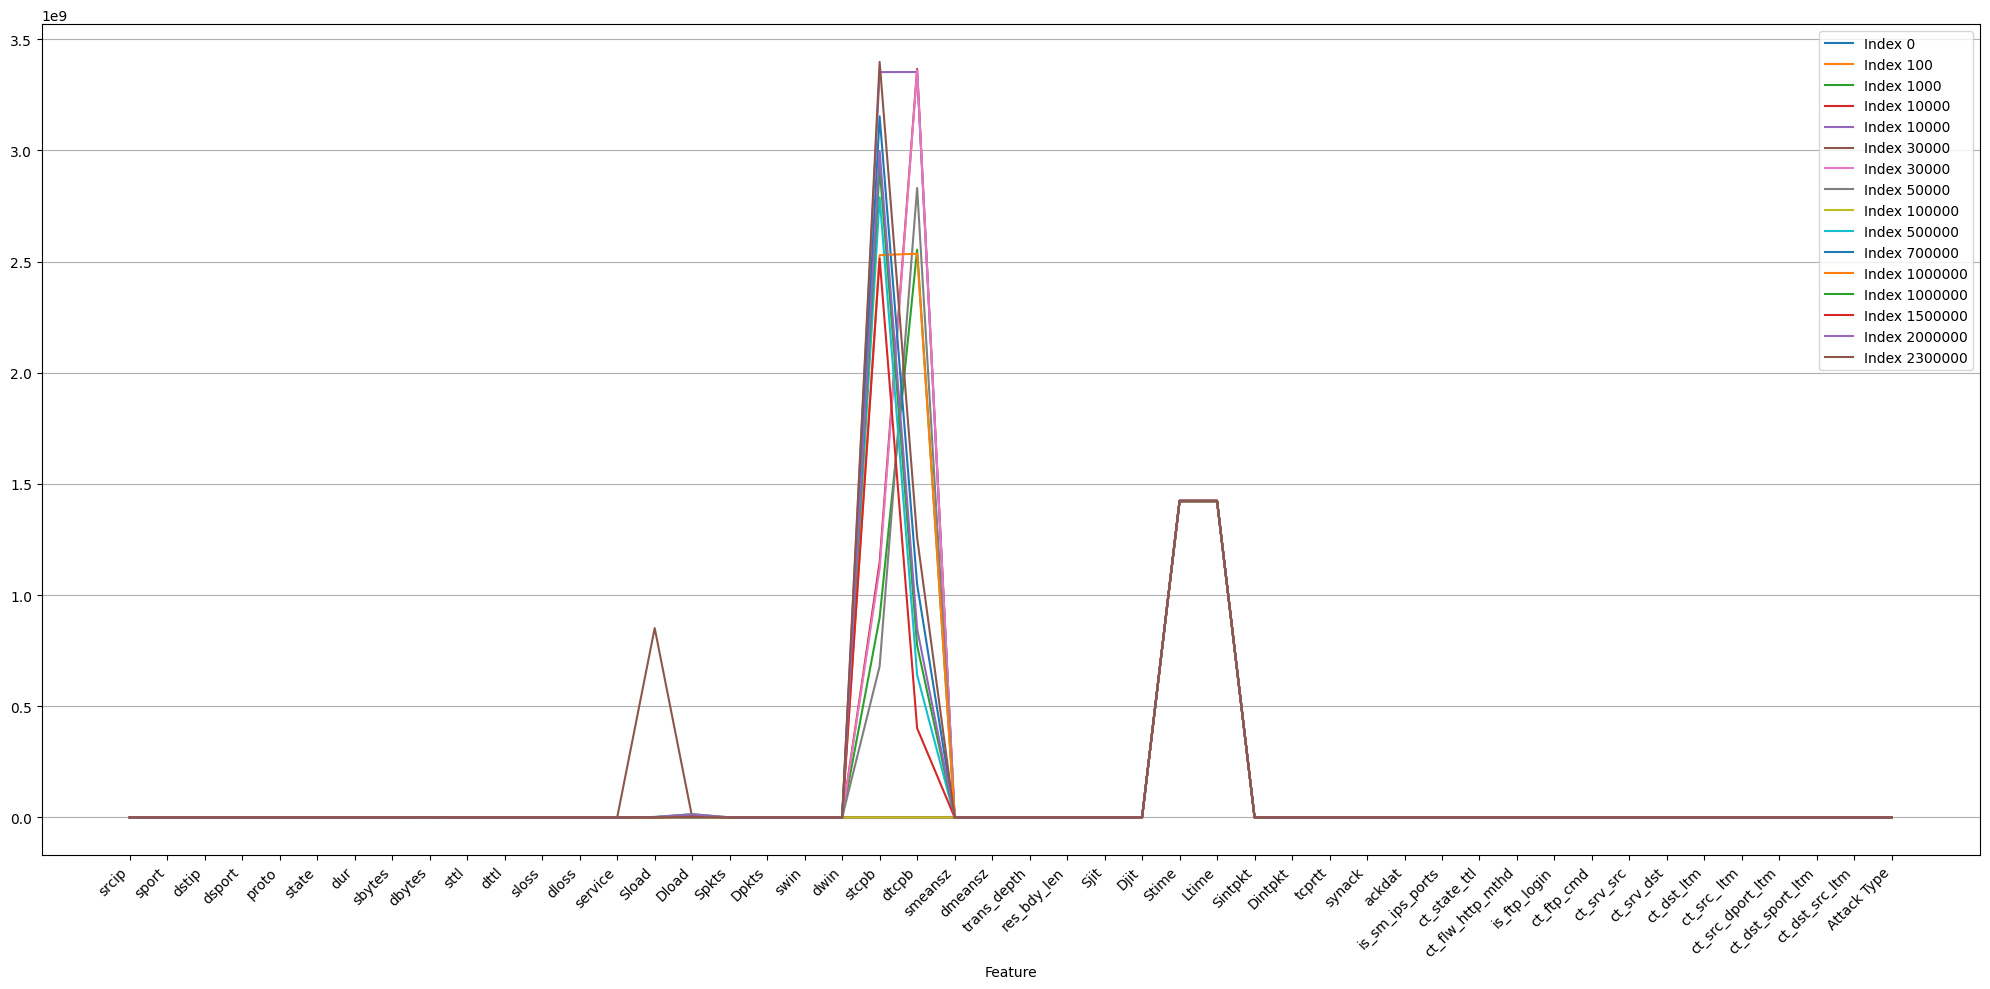

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(data.loc[0], label='Index 0')
plt.plot(data.loc[100], label='Index 100')
plt.plot(data.loc[1000], label='Index 1000')
plt.plot(data.loc[10000], label='Index 10000')
plt.plot(data.loc[18888], label='Index 10000')
plt.plot(data.loc[30000], label='Index 30000')
plt.plot(data.loc[35555], label='Index 30000')
plt.plot(data.loc[50000], label='Index 50000')
plt.plot(data.loc[100000], label='Index 100000')
plt.plot(data.loc[500000], label='Index 500000')
plt.plot(data.loc[700000], label='Index 700000')
plt.plot(data.loc[1000000], label='Index 1000000')
plt.plot(data.loc[1555555], label='Index 1000000')
plt.plot(data.loc[1500000], label='Index 1500000')
plt.plot(data.loc[2000000], label='Index 2000000')
plt.plot(data.loc[2300000], label='Index 2300000')
plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.title("Random Forest Feature Importances")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.legend()
plt.show()

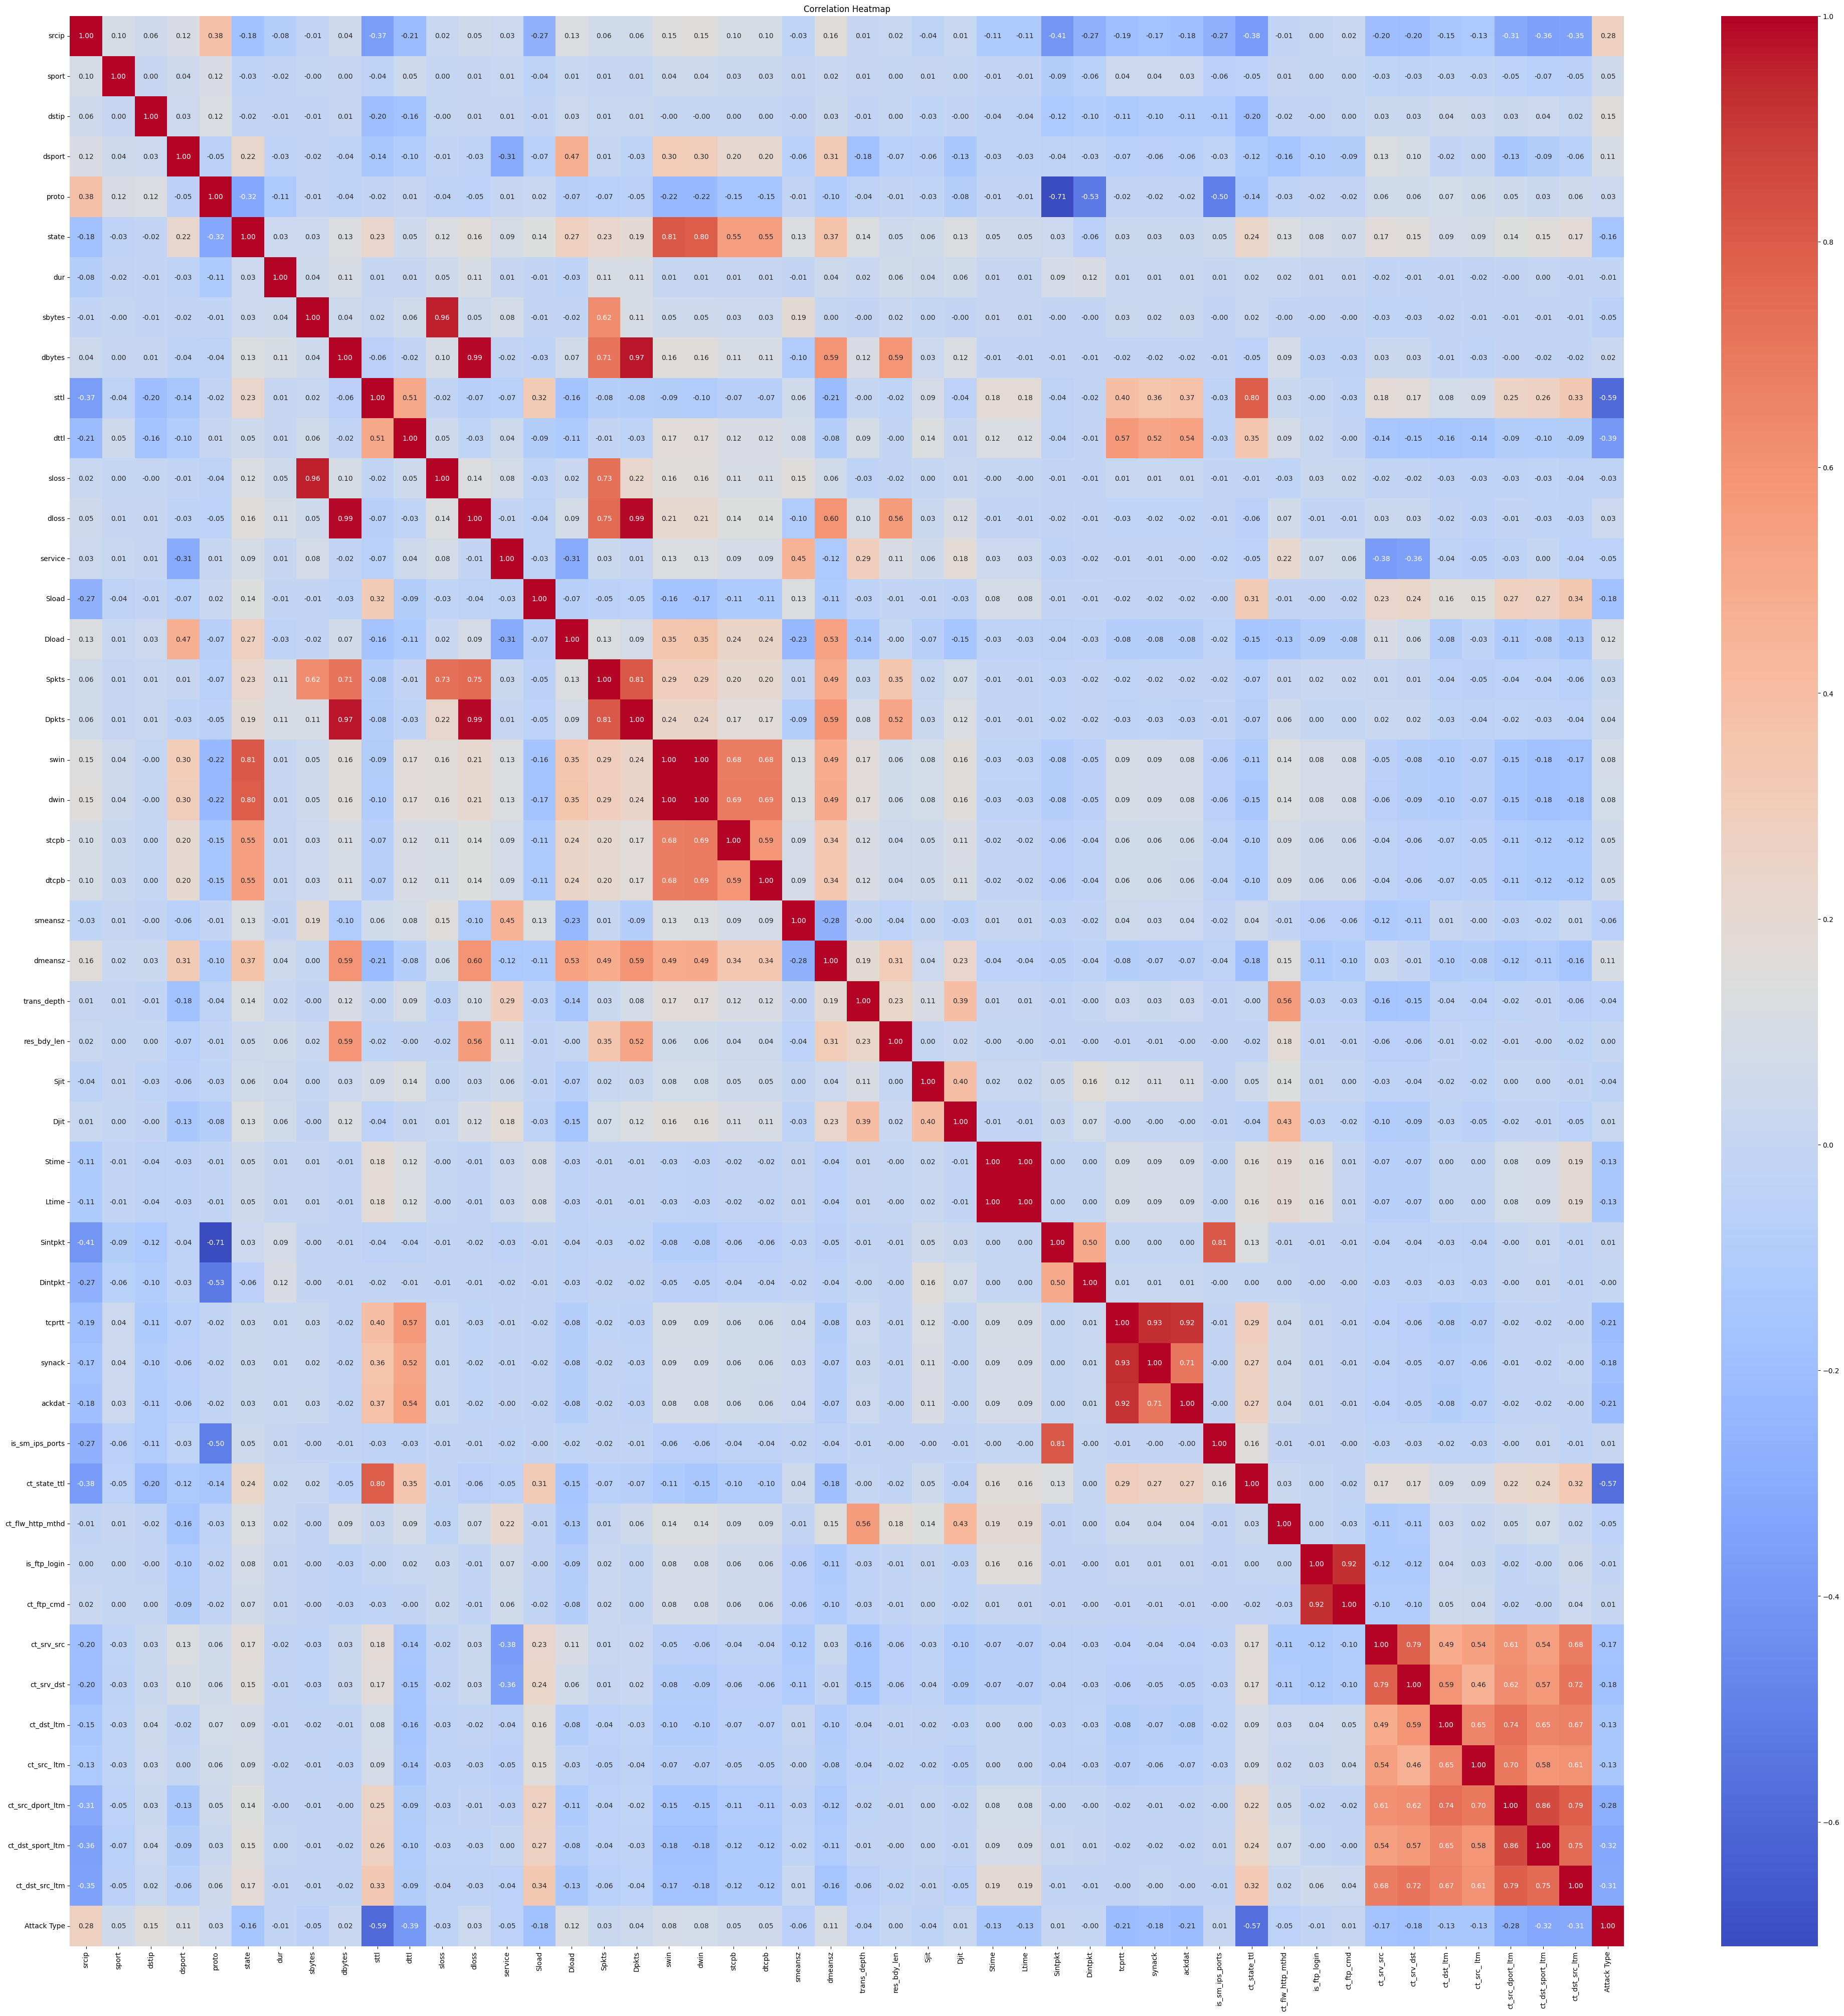

In [25]:
# Correlation using heatmap to interpret the relation and multicolliniarity after dropping no contribution features

corr_matrix = data.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")#cmap - color_map
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Highly correlated features to be dropped

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) >= 0.85) or (abs(corr_matrix.iloc[i, 47]) < 0.001): # 70 index of target variable
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Number of highly correlated features and having relation \nbetween -0.01 and 0.01 to a target variable:", len(correlated_features))
for feature in correlated_features:
    correlation = data[[feature, 'Attack Type']].corr().iloc[0, 1]
    print(f"{feature}: {correlation}")

Number of highly correlated features and having relation 
between -0.01 and 0.01 to a target variable: 10
ackdat: -0.20975994066183087
Dpkts: 0.039639107374845044
Ltime: -0.1314641913819962
dwin: 0.07754466898003574
ct_dst_sport_ltm: -0.3193571400857324
ct_ftp_cmd: 0.009220722401361564
synack: -0.1826483477425
Dintpkt: -0.0003288327410334861
dloss: 0.0319736829792808
sloss: -0.029980110010074276


In [27]:
# Dropping above and 85% correlated features

data.drop(labels=correlated_features, axis=1, inplace=True)
X.drop(labels=correlated_features, axis=1, inplace=True)
data.shape

(2059413, 38)

Data Visualization

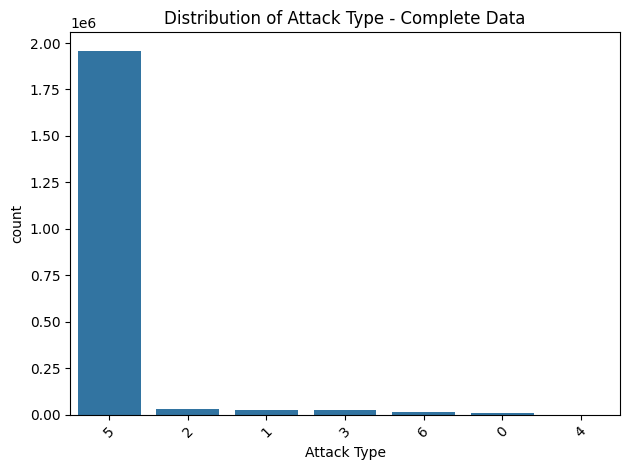

In [472]:
sns.countplot(data=data, x='Attack Type', order=data['Attack Type'].value_counts().index)
plt.title('Distribution of Attack Type - Complete Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

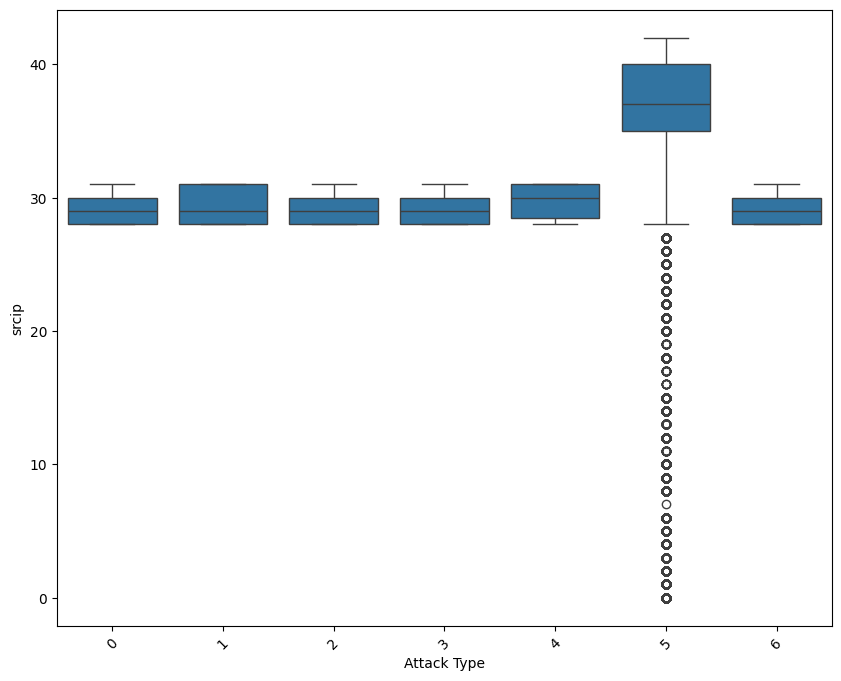

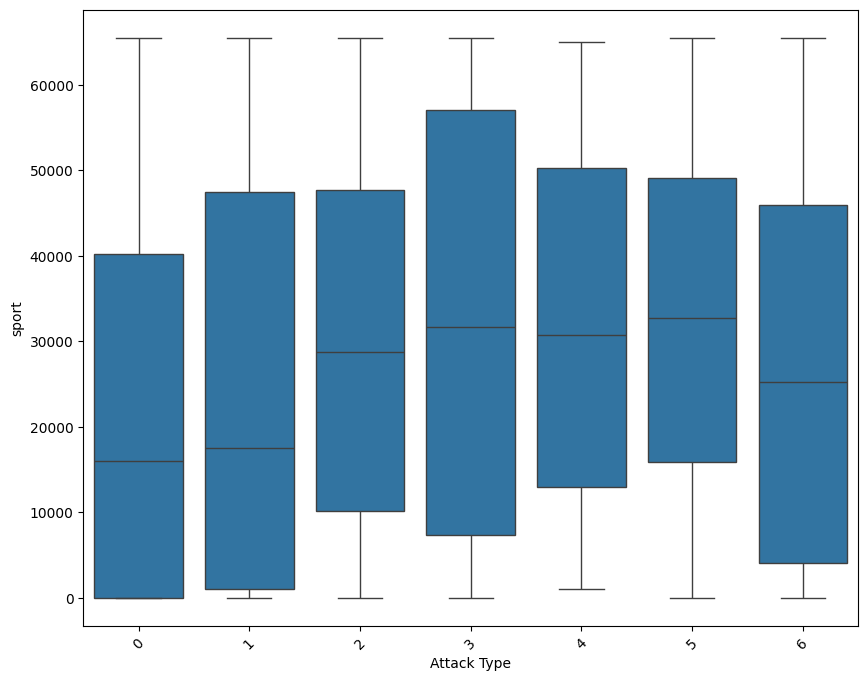

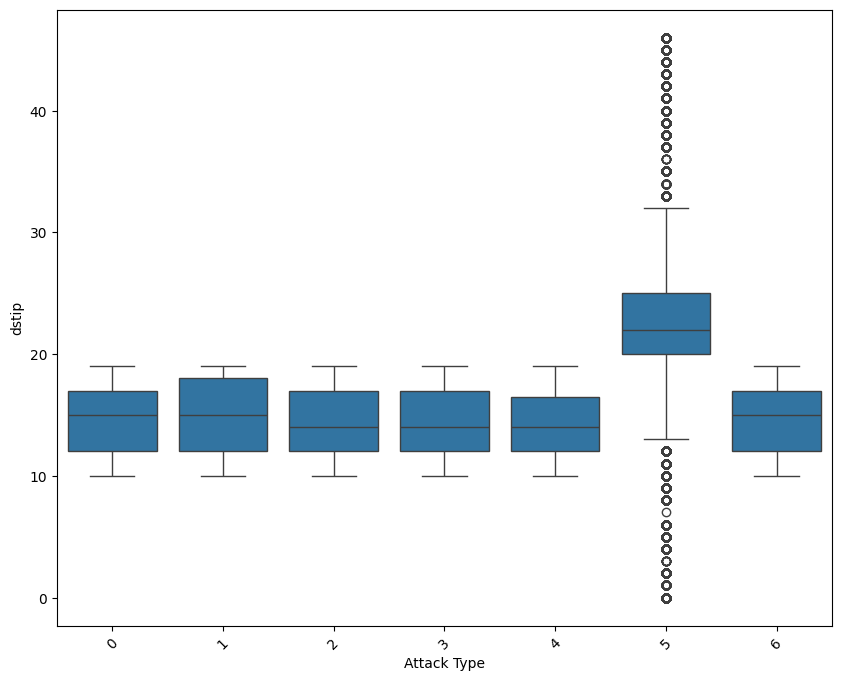

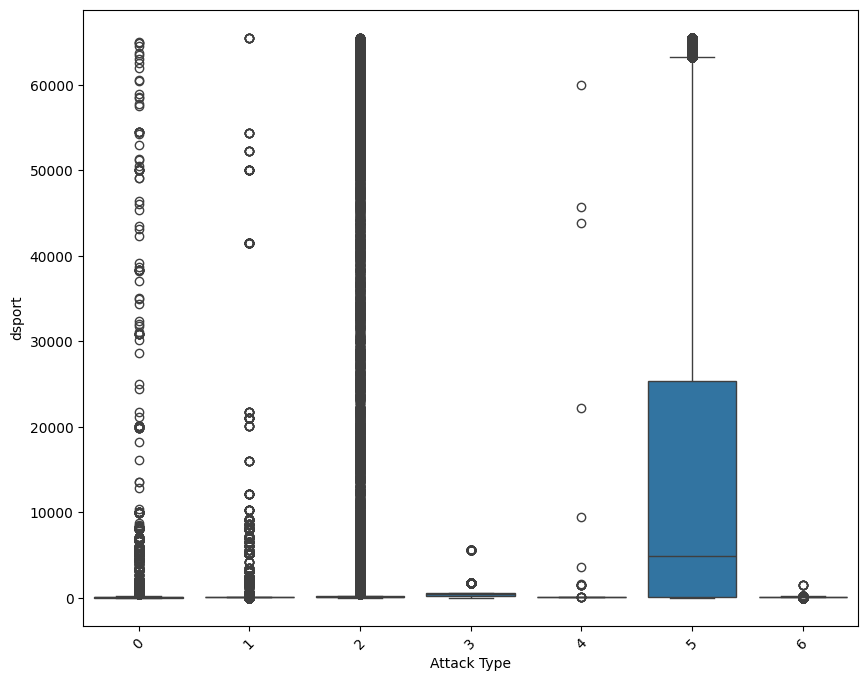

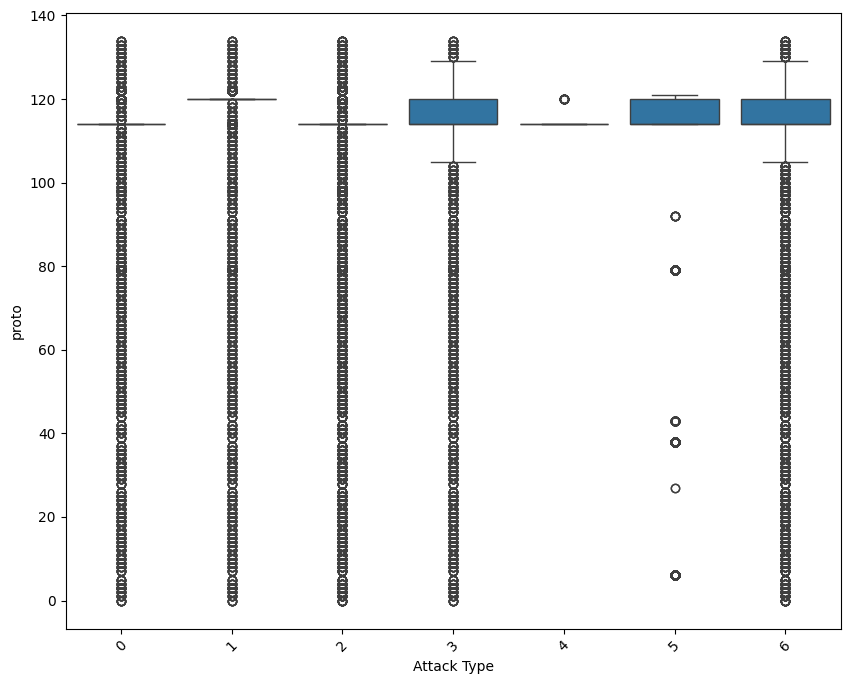

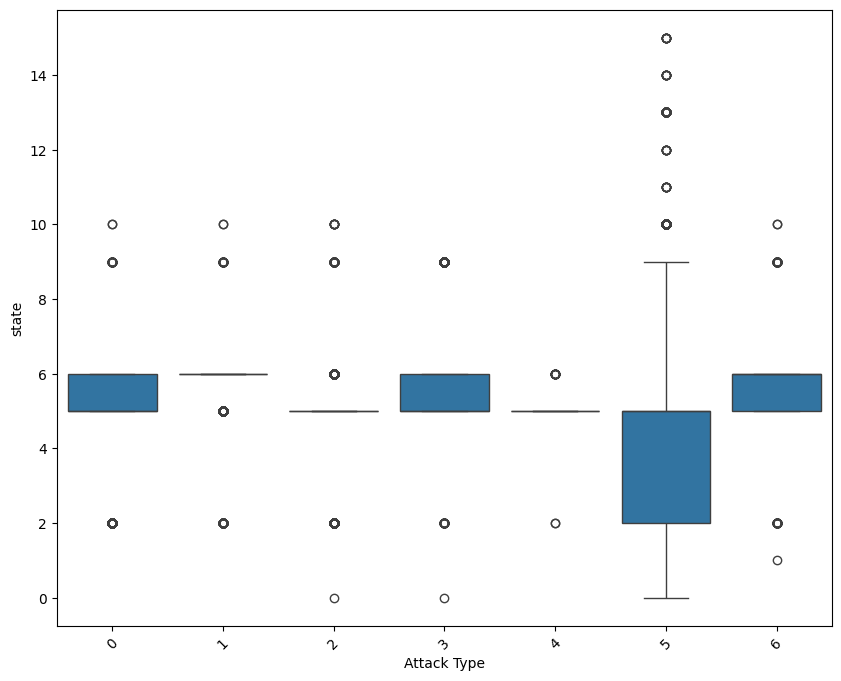

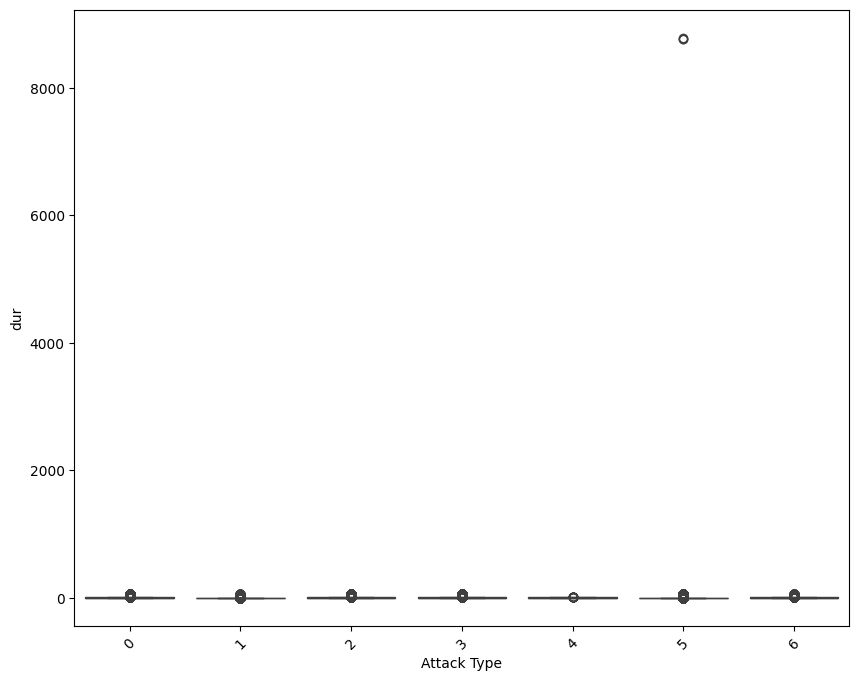

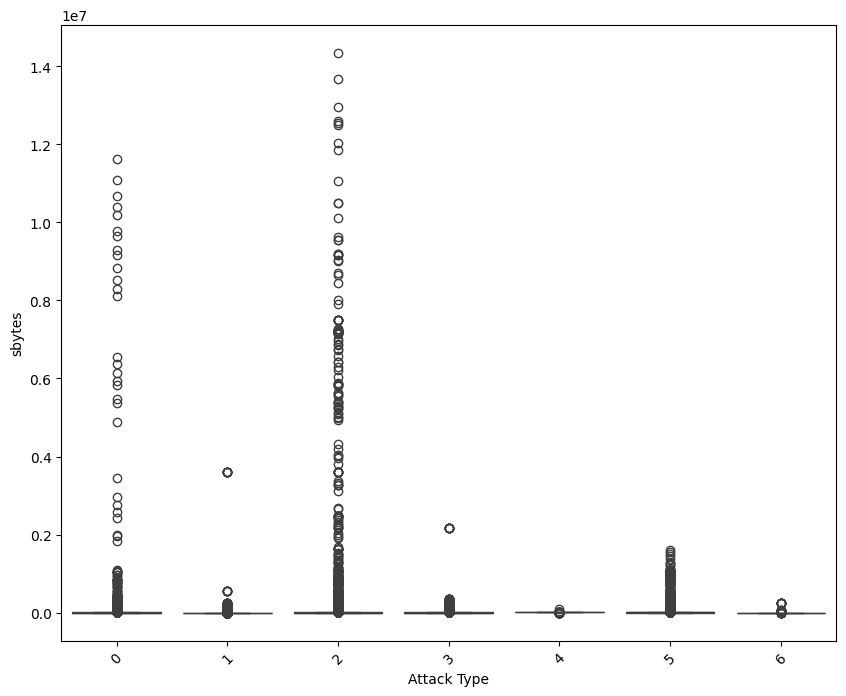

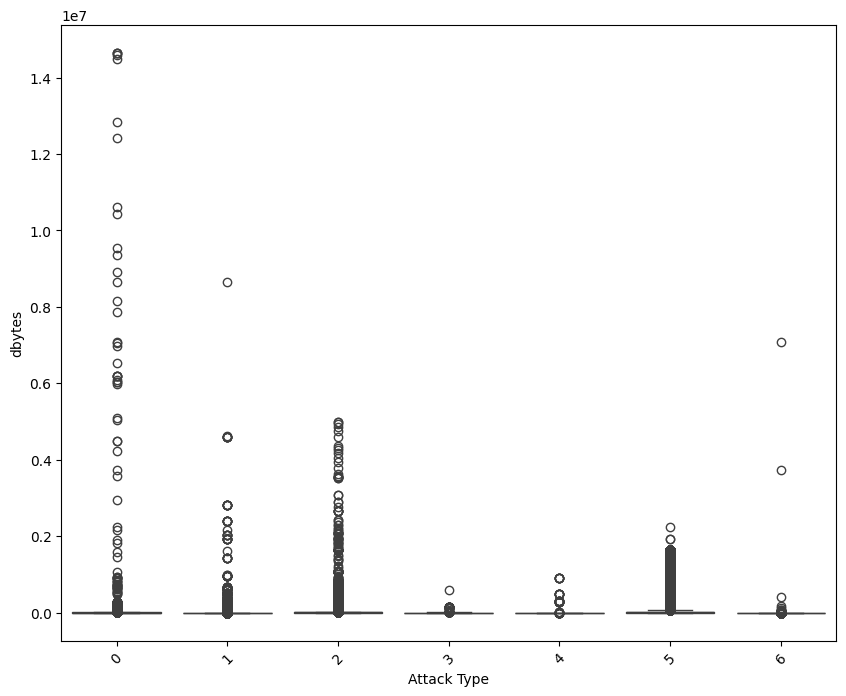

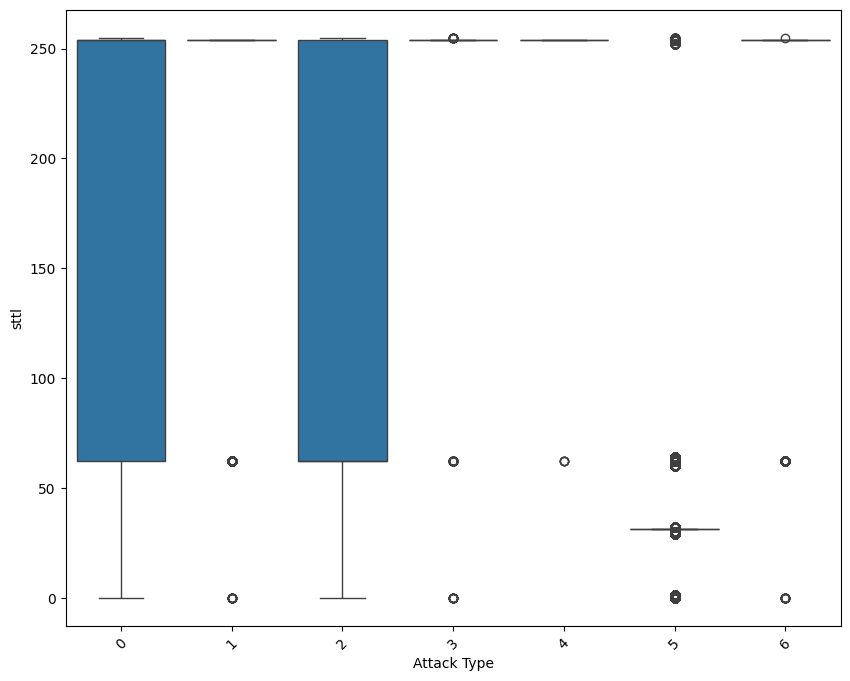

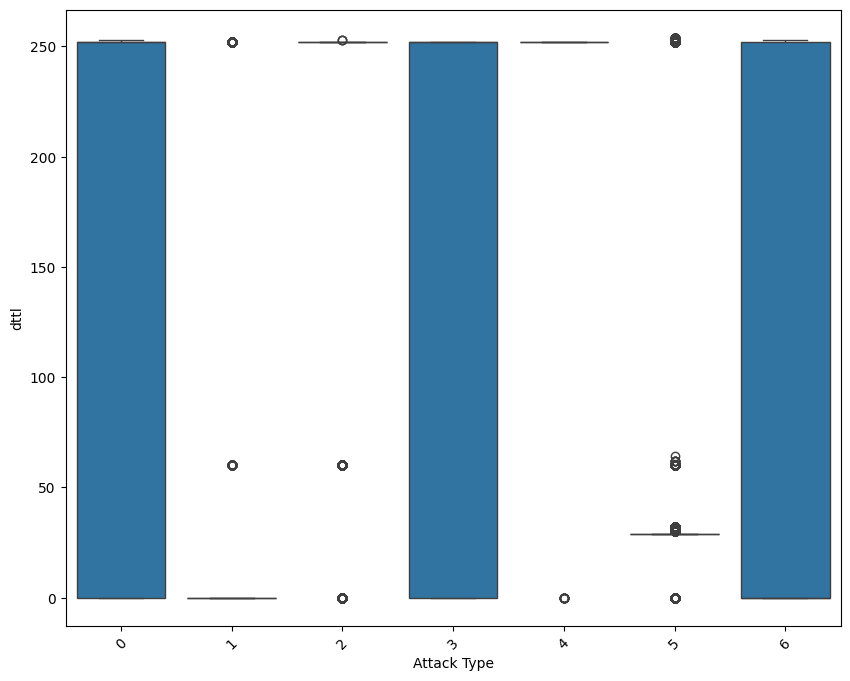

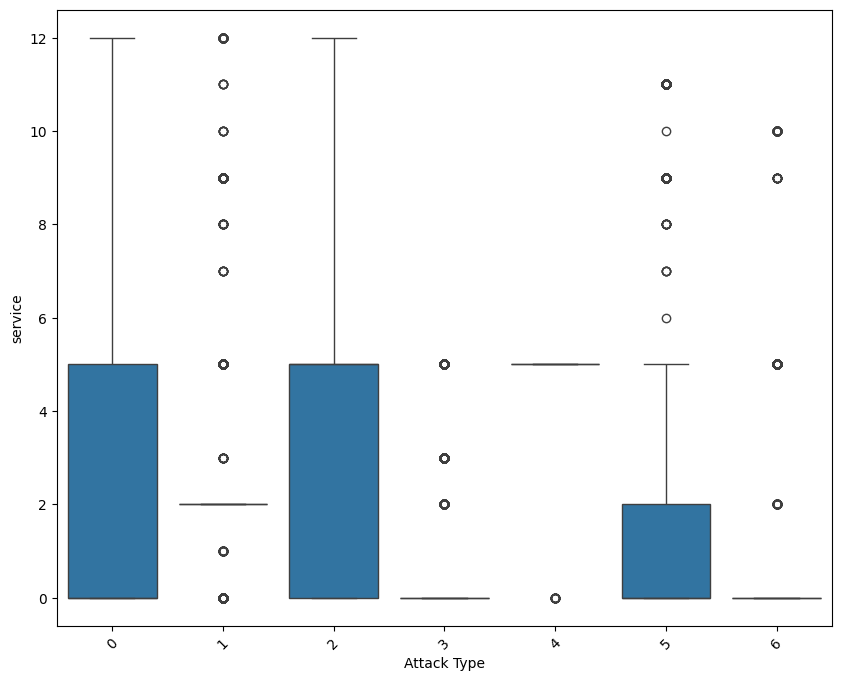

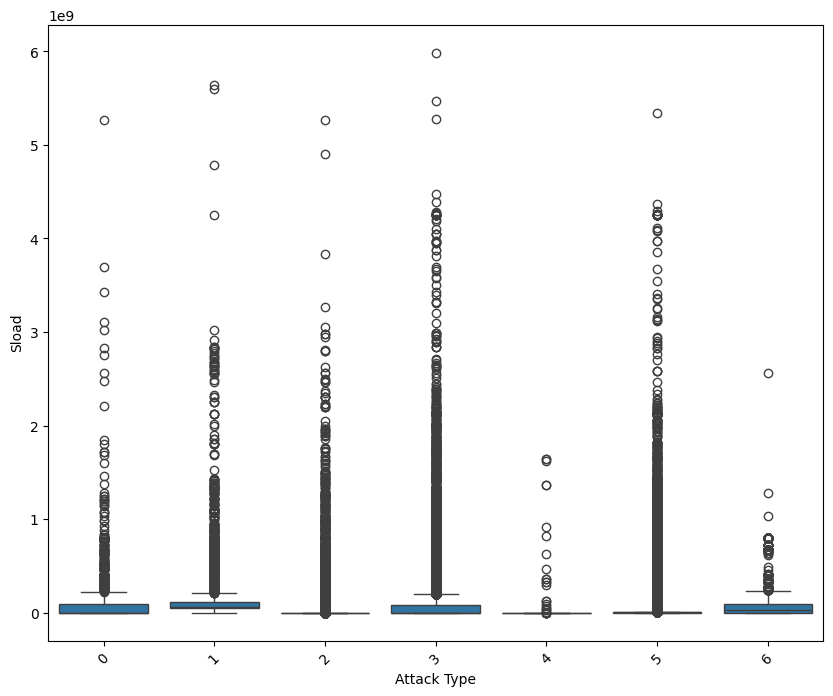

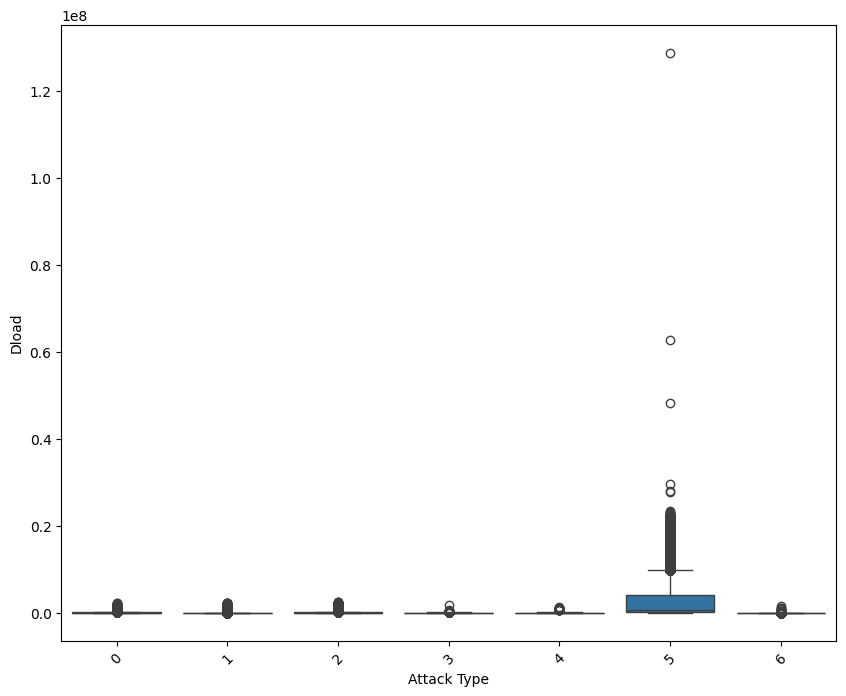

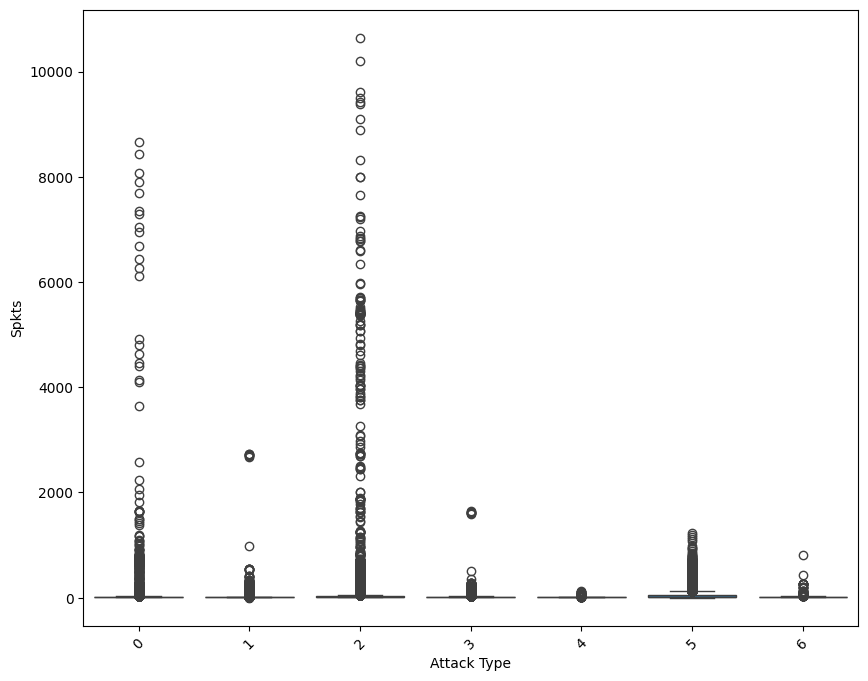

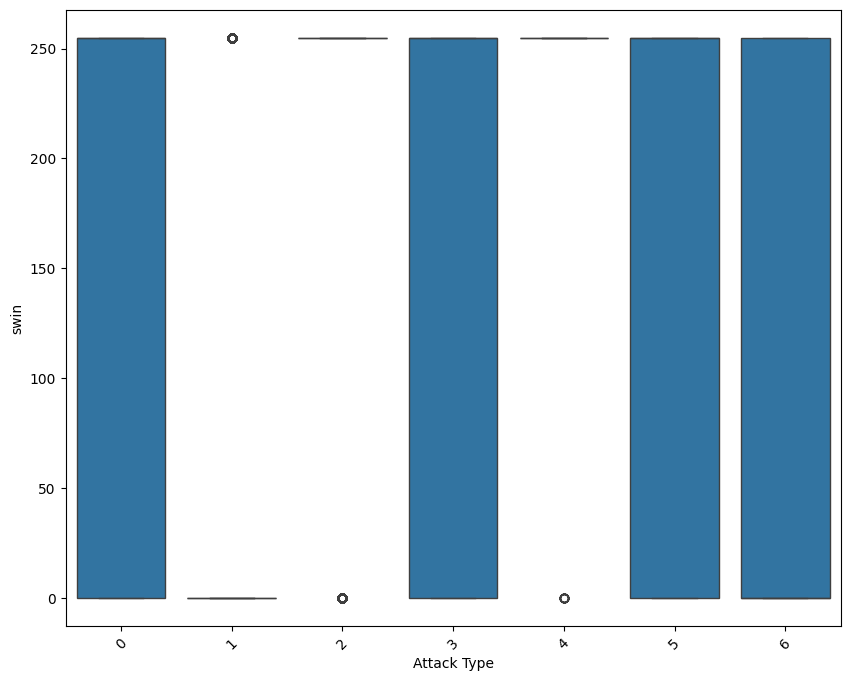

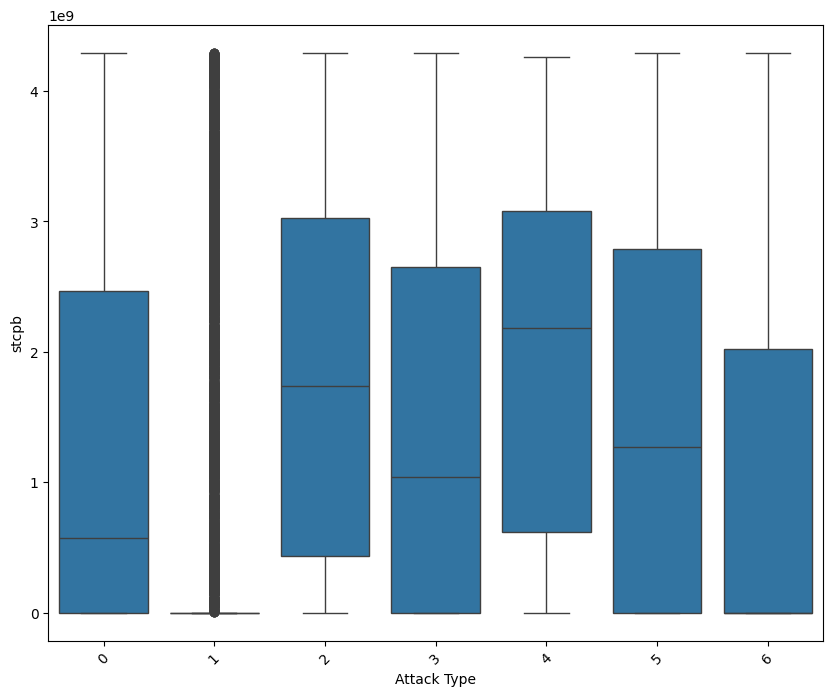

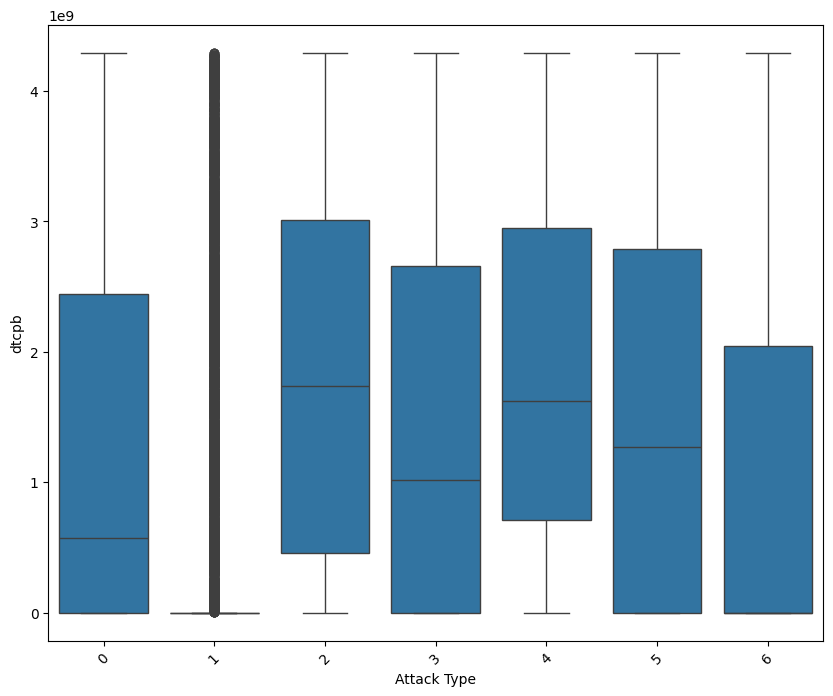

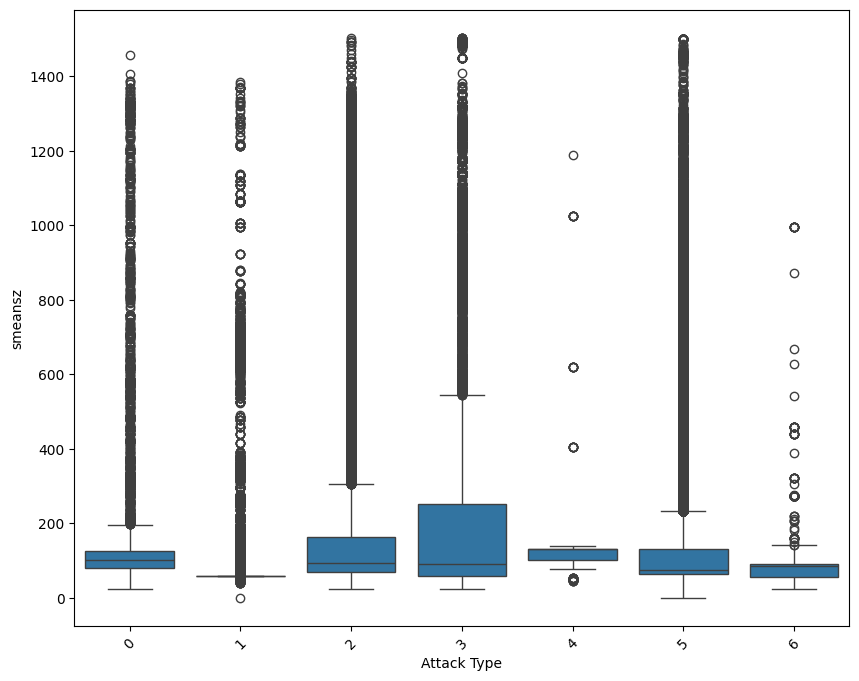

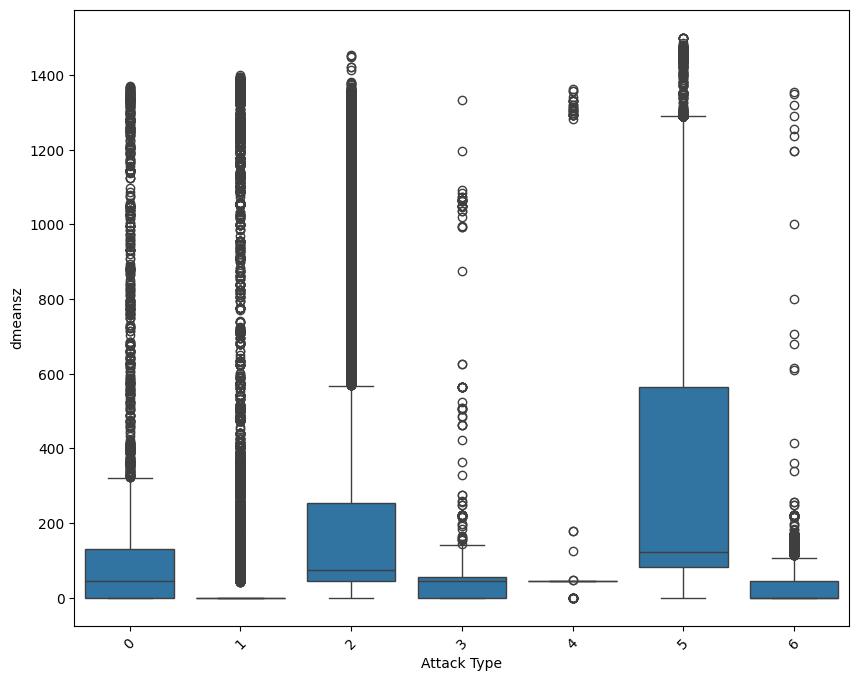

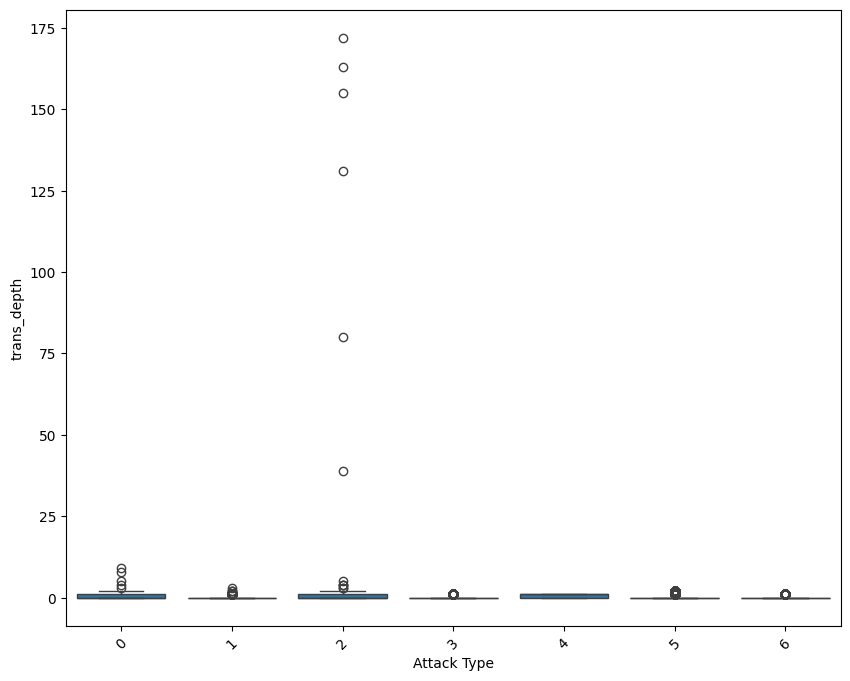

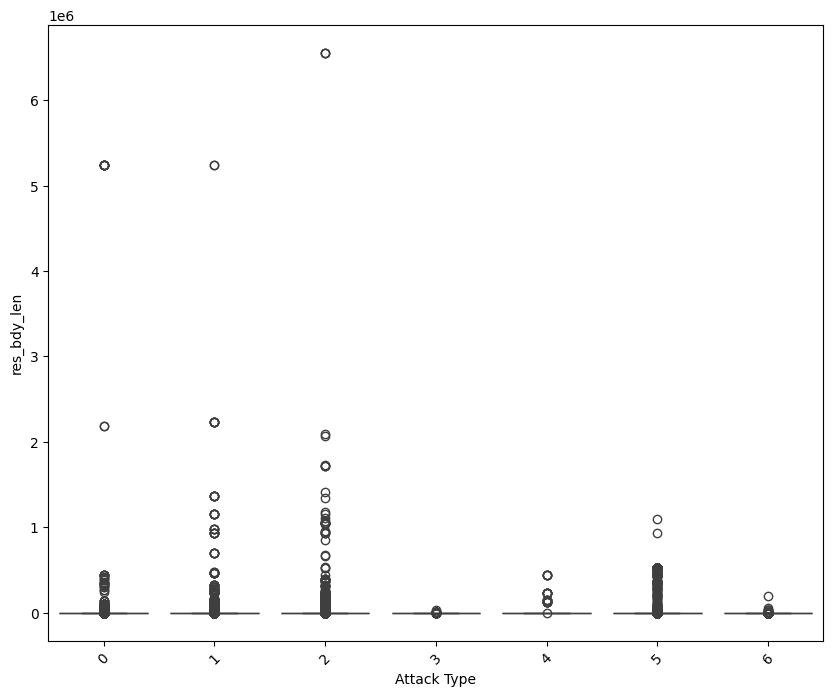

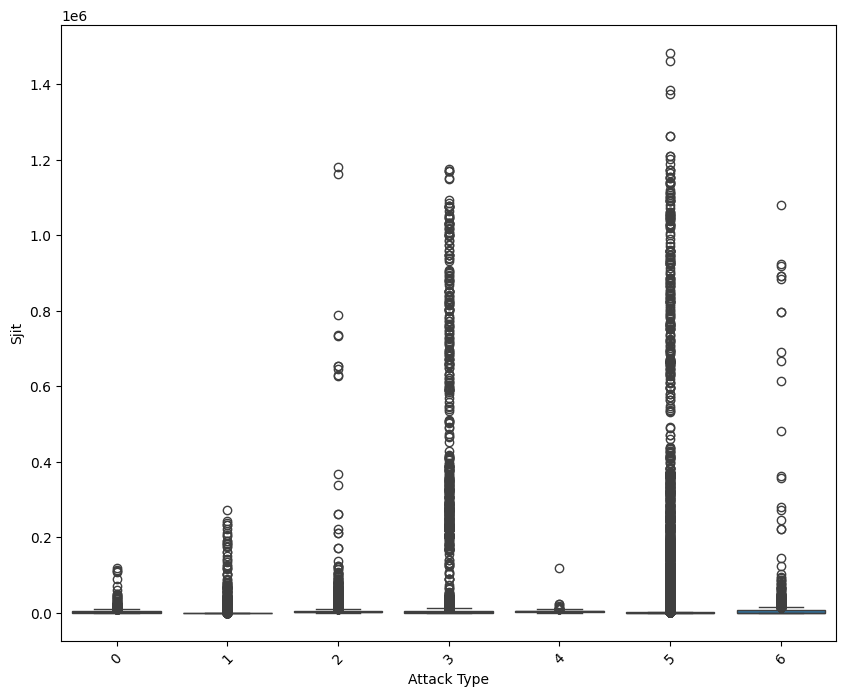

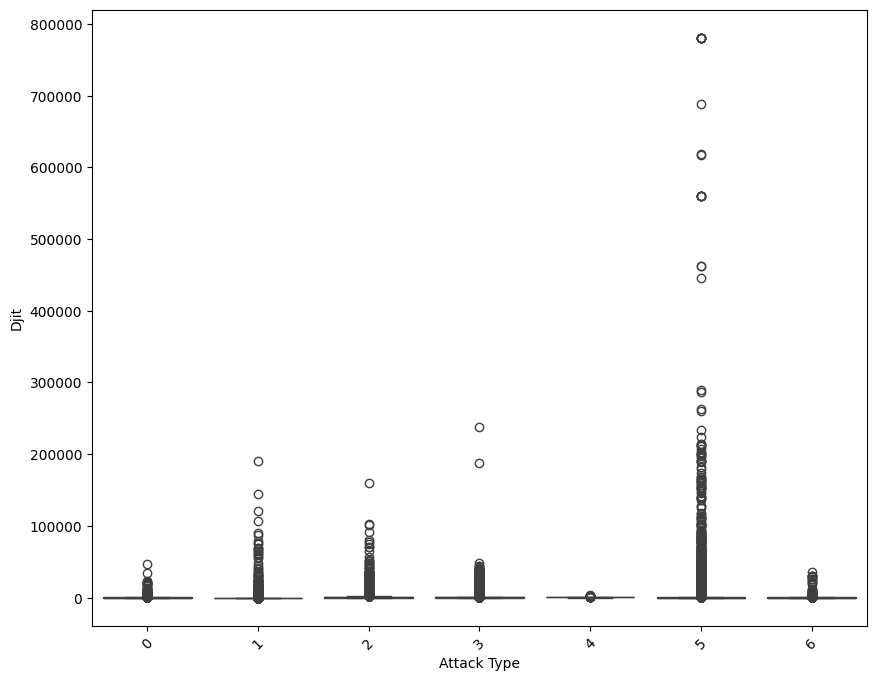

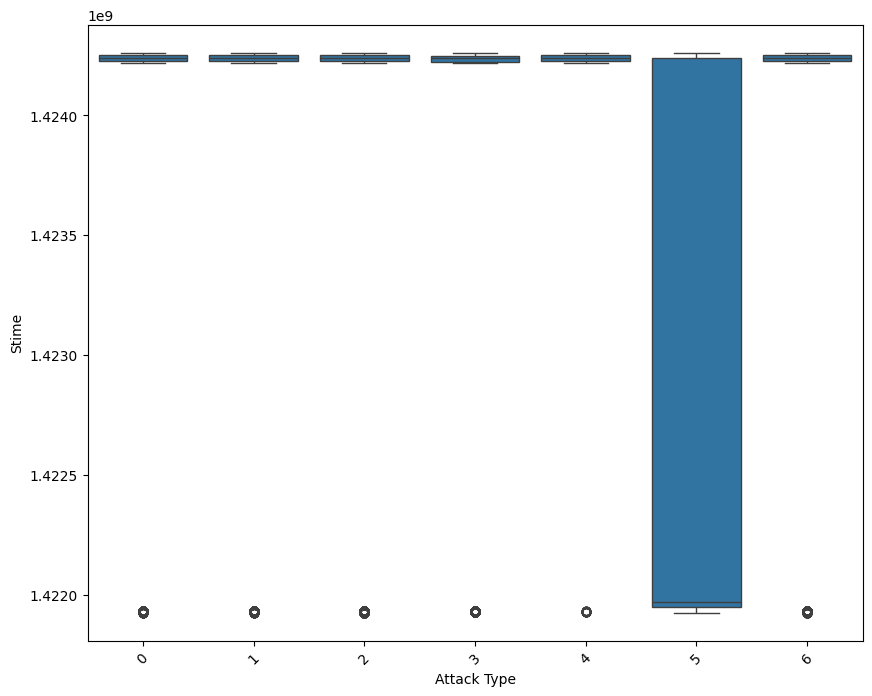

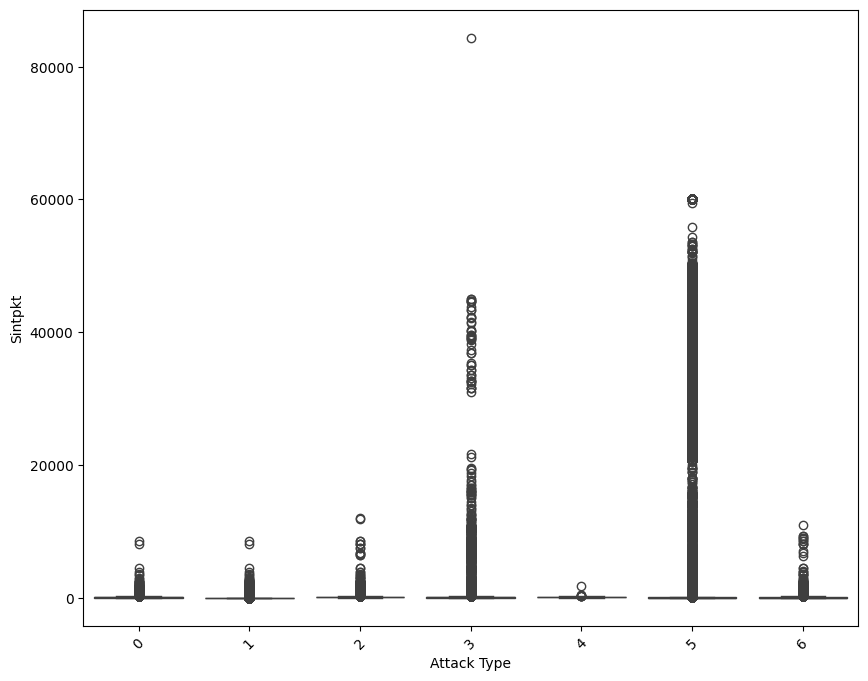

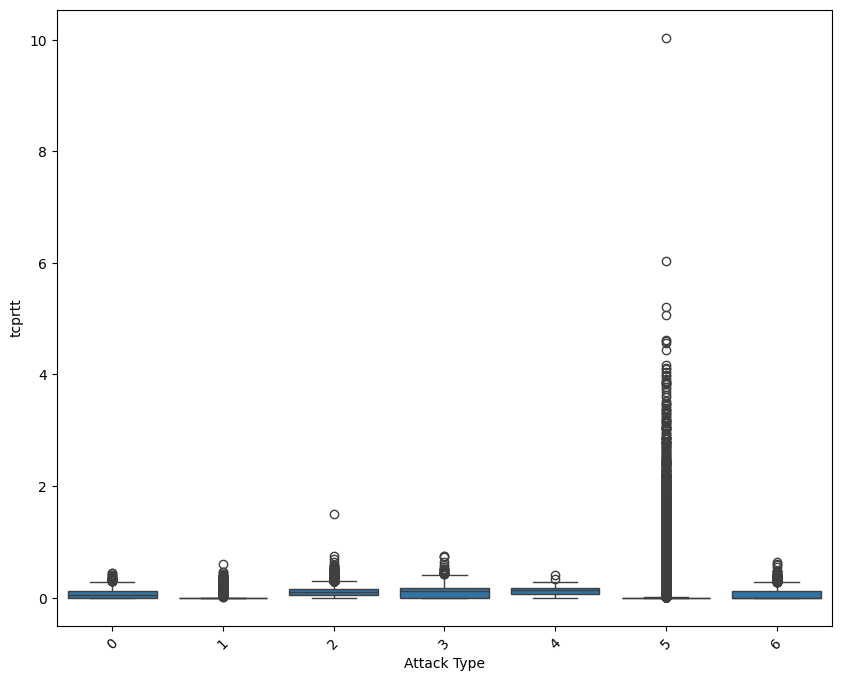

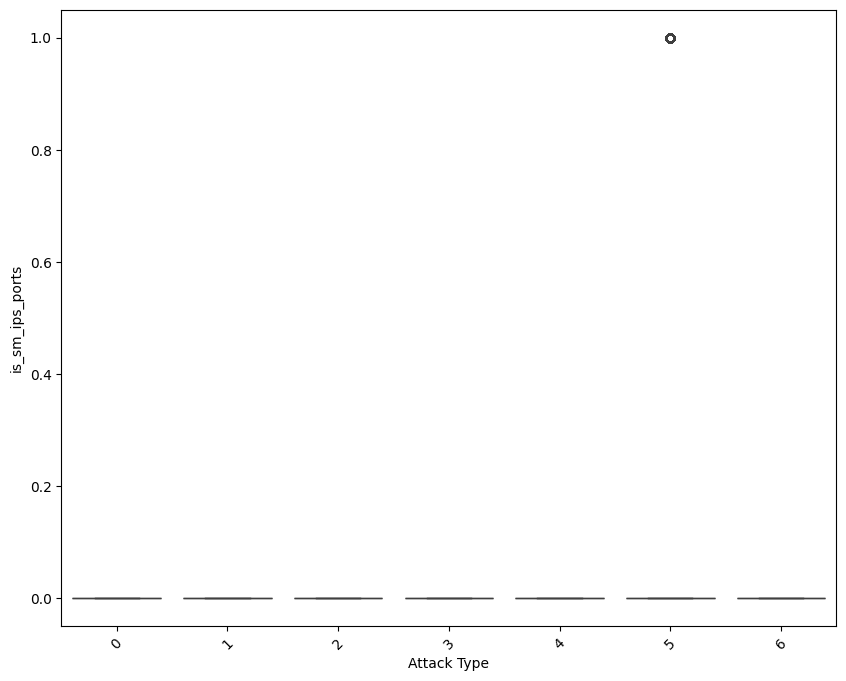

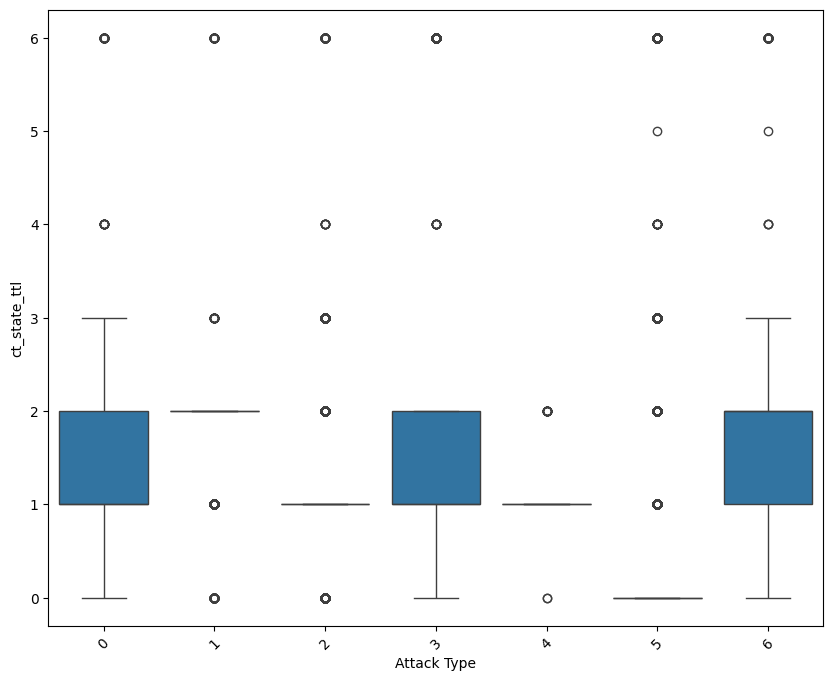

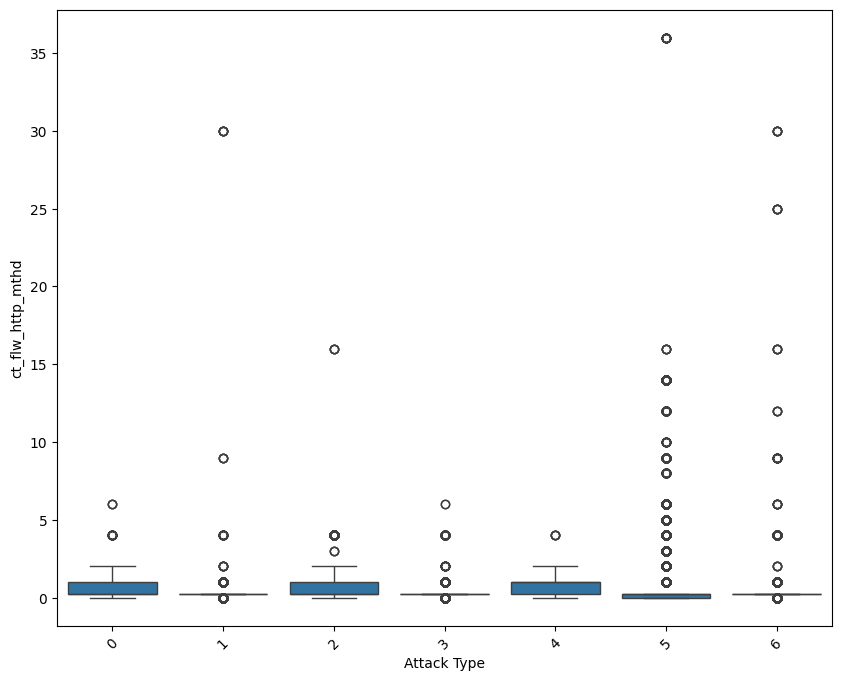

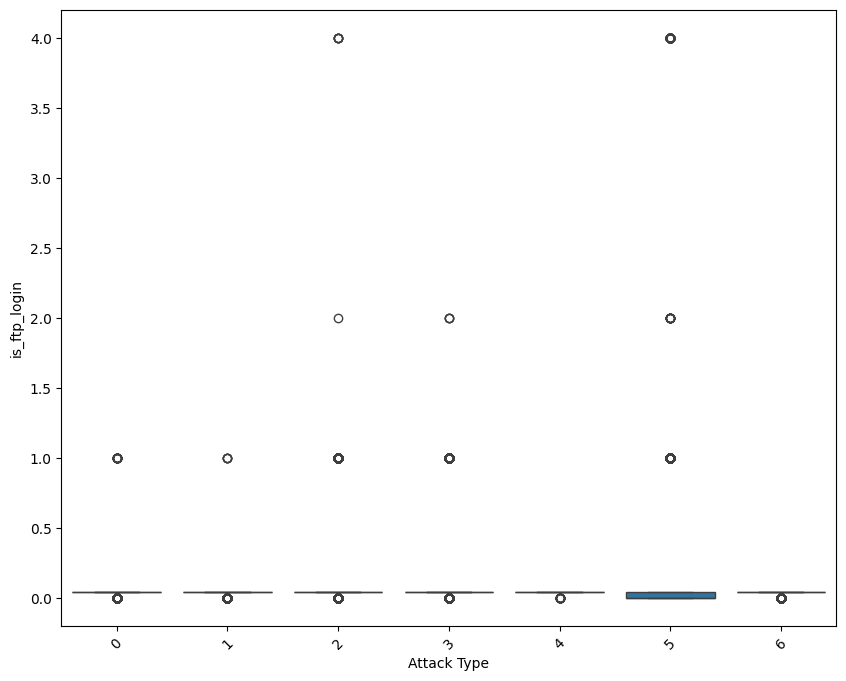

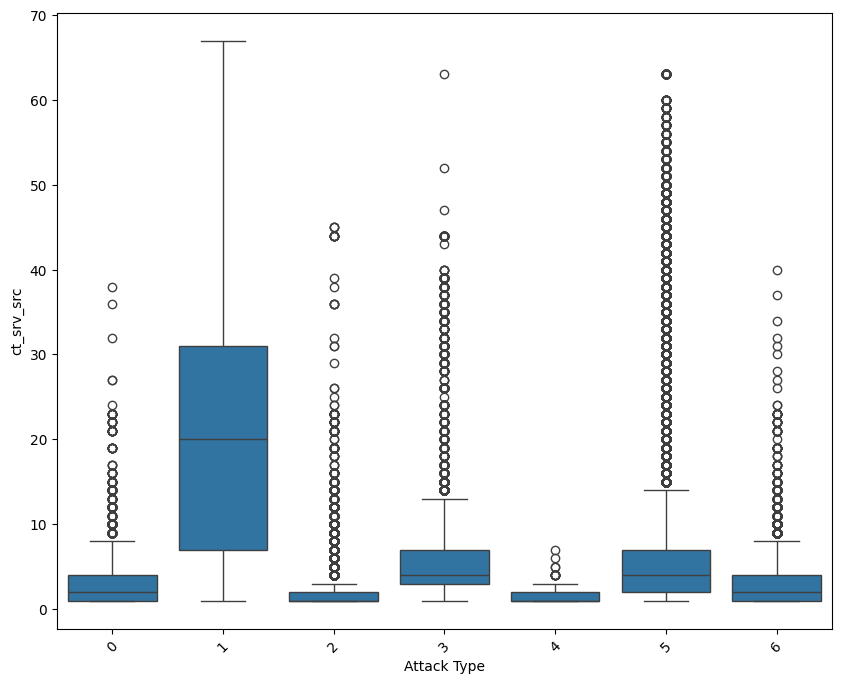

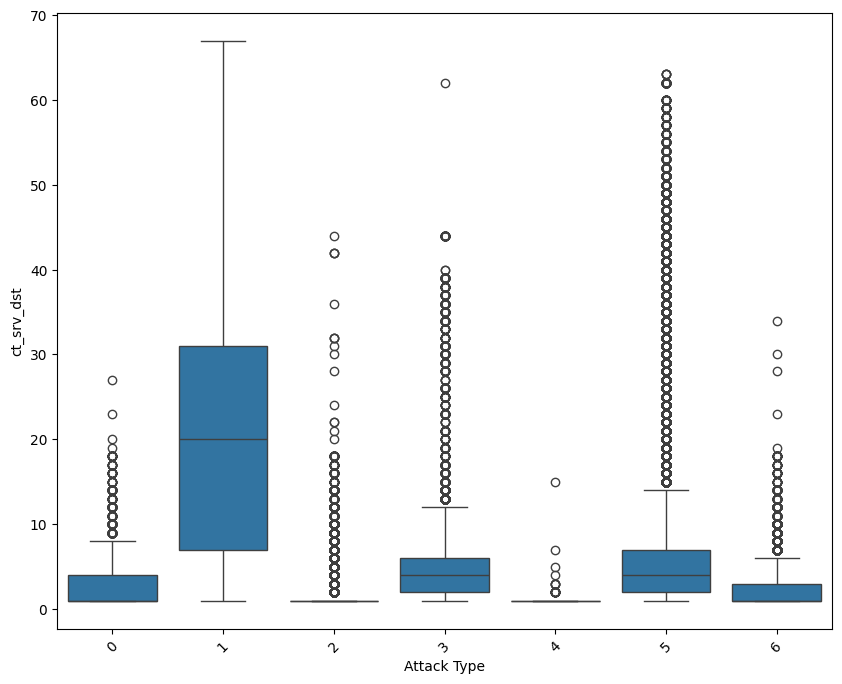

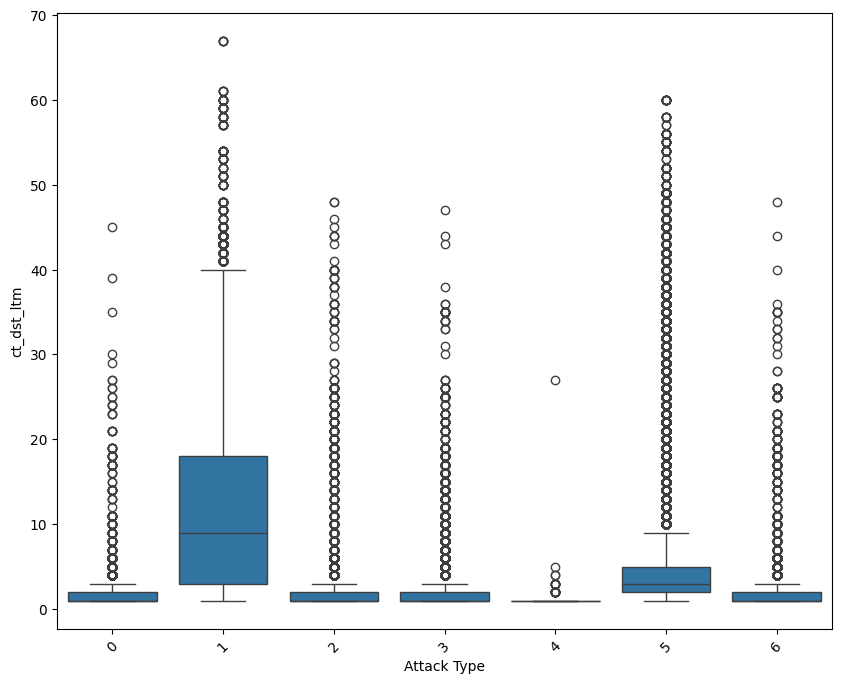

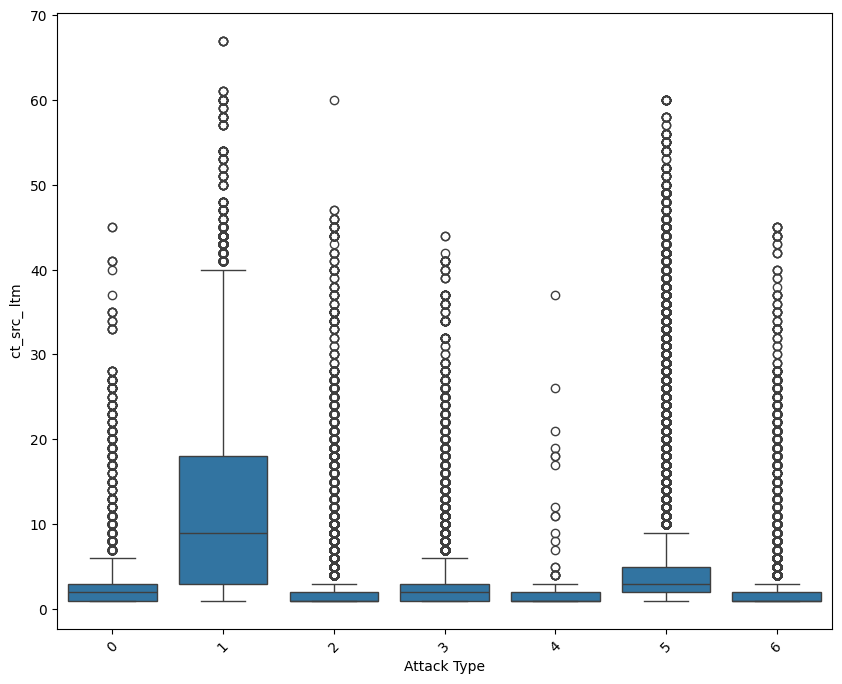

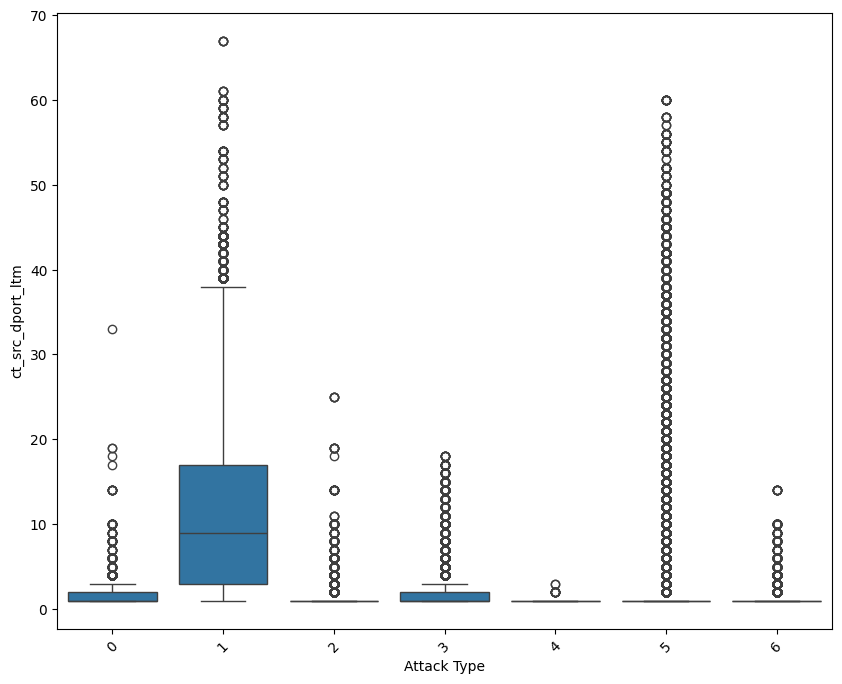

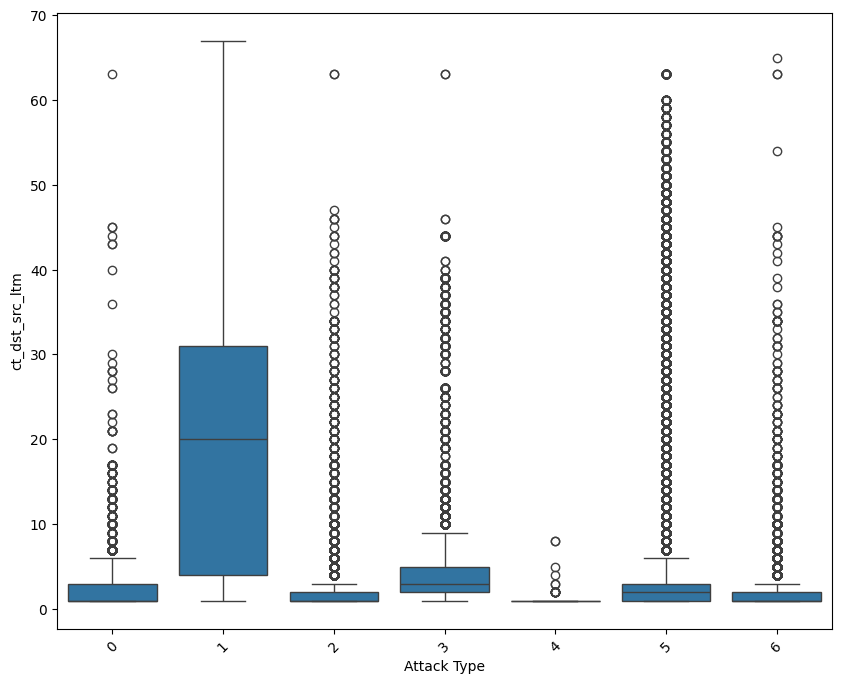

In [473]:
for col in X.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data, y=col, x=data['Attack Type'])
    plt.xticks(rotation=45)

Data Pre-processing, data balancing, normalization, standardization

In [28]:
# Train/test dataset splitting using train_test_split module

def train_test_split_fun(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [29]:
# Apply SMOTE for data imbalance treatment

def apply_smote(X_train, y_train, strategy):
    smote = SMOTE(sampling_strategy=strategy)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    return X_train, y_train

In [30]:
# Standardization/Normalization and scaling

def standardize(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

    return X_train_scaled, X_test_scaled

In [31]:
# Implement PCA for reduction, Apply PCA (you can specify number of components or leave empty to keep all)
# First approach: PCA with a specified number of components

def apply_pca(X_train, X_test):
    pca = PCA(0.95) # retain 95% of the information (variance) in the original dataset
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Explained variance ratio and n_components
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance ratio: {explained_variance}")
    print(f"Number of components: {pca.n_components_}")
    
    # PCA components as a DataFrame
    loadings = pd.DataFrame(pca.components_, columns=X_train.columns,
                            index=[f'PC{i+1}' for i in range(pca.n_components_)])
    
    # Top 3 contributing features to the first principal component
    top_features_pc1 = loadings.loc['PC1'].abs().sort_values(ascending=False)

    return X_train_pca, X_test_pca

In [32]:
# Second approach: PCA with a specified explained variance ratio, Visualizing PCA results in 2D

def pca_second_approach(n_comp, X_train, X_test, y):
    pca = PCA(n_components=n_comp)  # Reduce to 2 components for visualization
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    cols = []
    for i in range(n_comp):
        cols.append(f"PC{i}")

    pca_df = pd.concat([pd.DataFrame(X_train_pca, columns=cols), pd.DataFrame(X_test_pca, columns=cols)])
    # pca_df = pd.DataFrame(data=combined_data, columns=cols)
    pca_df['label'] = y.values
    
    plt.figure(figsize=(8, 6))
    for label in pca_df['label'].unique():
        plt.scatter(
            pca_df[pca_df['label'] == label]['PC1'],
            pca_df[pca_df['label'] == label]['PC2'],
            label=label
        )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: 2D Projection of Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()

RandomForestClassifier for Binary And Multi-class Classification

In [33]:
# Function for RandomforestClassifier model

def random_forest_model(X_train, y_train, X_test, y_test, filename):
    model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # n_jobs=-1 -> Use all cores

    # Train and Save the trained model using joblib
    model.fit(X_train, y_train)
    joblib.dump(model, filename)

    # Prediction on training and testing dataset for underfit/overfit analyzing
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluation metrics
    class_report = classification_report(y_test, test_pred)
    print(f"Classification Report \n {class_report}")

    test_acc = accuracy_score(y_test, test_pred)
    print(f'Testing Accuracy: {test_acc * 100:.2f}%')

    train_acc = accuracy_score(y_train, train_pred)
    print(f'Training Accuracy: {train_acc * 100:.2f}%')

    conf_matrix = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')#, xticklabels=target, yticklabels=target
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    importances = model.feature_importances_
    return importances, test_pred

In [34]:
# Bar chart of feature importance for multi-class classification

def plot_barchart_for_feature_selection(X_train, importances):

    # Create DataFrame with features and their importances
    feature_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Select features with importance >= 0.01
    selected_features_df = feature_df[feature_df['Importance'] >= 0.01]

    # Get the feature names only
    selected_feature_names = selected_features_df['Feature'].tolist()

    print(f"Number of selected features: {len(selected_feature_names)}")
    print(selected_feature_names)
    plt.figure(figsize=(20, 10))
    plt.bar(feature_df['Feature'], feature_df['Importance'], color='skyblue')
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Random Forest Feature Importances")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [35]:
def plot_roc_curve(X_test, y_test, model):
    # Ensure you have the model loaded and the test data prepared
    # X_test: feature set for testing
    # y_test: true labels for testing
    # y_pred_proba: predicted probabilities from your model (not labels)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use probability of class 1

    # 1. Compute FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # 2. Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # 3. Plot the ROC Curve
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [36]:
# Function to plot learning curve for model evaluation

from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

def plot_learning_curve(model, X, y, metric='accuracy', cv=5, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validation score')

    plt.title(f'Learning Curve ({metric.capitalize()})')
    plt.xlabel('Training Examples')
    plt.ylabel(metric.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [37]:
# Export the first three decision trees from the forest

def display_decision_trees(model, X_train):
    for i in range(3):
        tree = model.estimators_[i]
        dot_data = export_graphviz(
            tree,
            feature_names=X_train.columns,
            filled=True,
            max_depth=2,
            impurity=False,
            proportion=True)
        graph = graphviz.Source(dot_data)
        display(graph)

Binary Class Classification

In [38]:
X2_train, X2_test, z_train, z_test = train_test_split_fun(X, z)
X.shape, X2_train.shape, X2_test.shape, z.shape, z_train.shape, z_test.shape

((2059413, 37), (1647530, 37), (411883, 37), (2059413,), (1647530,), (411883,))

In [39]:
X2_train, z_train = apply_smote(X2_train, z_train, strategy='minority')
z.value_counts(), z_train.value_counts()

(Normal Traffic    1959770
 Attack              99643
 Name: count, dtype: int64,
 Normal Traffic    1567787
 Attack            1567787
 Name: count, dtype: int64)

In [40]:
X2_train_scaled, X2_test_scaled = standardize(X2_train, X2_test)
X2_train_scaled.shape, X2_test_scaled.shape

((3135574, 37), (411883, 37))

In [41]:
X2_train_pca, X2_test_pca = apply_pca(X2_train_scaled, X2_test_scaled)

Explained variance ratio: [0.18895313 0.11633712 0.07662057 0.05693033 0.05564333 0.04902217
 0.04463473 0.03599515 0.03487207 0.03098251 0.02829947 0.02730665
 0.02391569 0.02251619 0.02033636 0.01914134 0.01829983 0.01706283
 0.01600989 0.01436397 0.01351394 0.01219537 0.01148581 0.01114239
 0.01072215]
Number of components: 25


Classification Report 
                 precision    recall  f1-score   support

        Attack       0.75      1.00      0.86     19900
Normal Traffic       1.00      0.98      0.99    391983

      accuracy                           0.98    411883
     macro avg       0.88      0.99      0.93    411883
  weighted avg       0.99      0.98      0.99    411883

Testing Accuracy: 98.43%
Training Accuracy: 99.16%


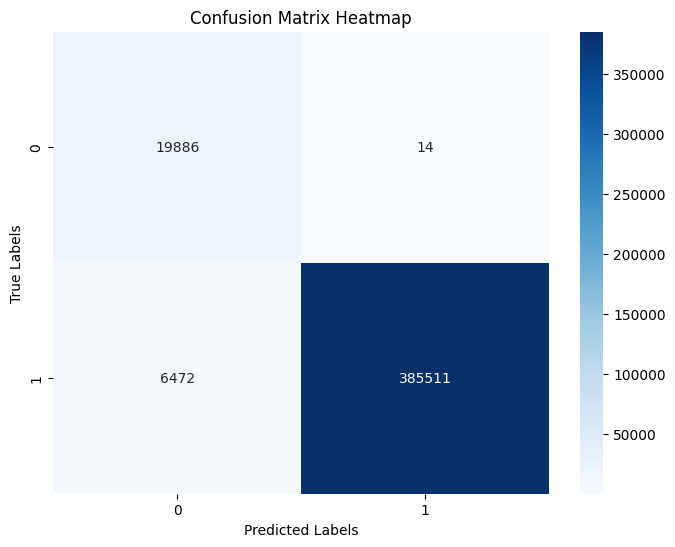

In [68]:
# Binary-class classification model training using SMOTE (over-sampling) and PCA (dimension reduction)

importance, test_pred = random_forest_model(X2_train_pca, z_train, X2_test_pca, z_test, 'binary_model.pkl')

In [70]:
# Displaying the first 25 predictions and actual values for binary classification

print(test_pred[:25], "👈👈Predicted")
print(np.array(z_test[:25]), "👈👈Actual")

['Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Attack' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Attack' 'Normal Traffic' 'Attack'] 👈👈Predicted
['Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Attack' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic'] 👈👈Actual


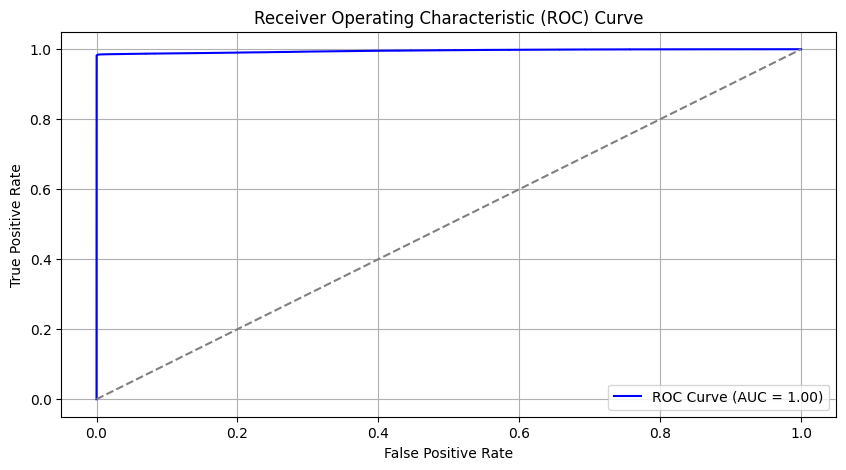

In [475]:
# Plot ROC curve and learning curve for binary classification

encoder = LabelEncoder()
z_test_encoded = encoder.fit_transform(z_test)

# Load the saved binary classification model
binary_model = joblib.load('rf_binary.pkl')
plot_roc_curve(X2_test_pca, z_test_encoded , binary_model)

In [477]:
# Plotting learning curve for binary-class classification

# plot_learning_curve(binary_model, X, z, metric='AUC', scoring='roc_auc')

# Display decision trees and plot feature importance for binary classification

# plot_barchart_for_feature_selection(top_features_pc1, importance)
# display_decision_trees(binary_model, X2_train)

Multi-class Classification 

In [42]:
X_train, X_test, y_train, y_test = train_test_split_fun(X, y)
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((2059413, 37), (1647530, 37), (411883, 37), (2059413,), (1647530,), (411883,))

In [43]:
sampling_strategy = {
    'Exploits': 1200000,
    'DoS/DDoS': 1200000,
    'Fuzzing': 1200000,
    'Reconnaissance': 1000000,
    'DoS': 1000000,
    'Malware': 1000000,
}

X_train, y_train = apply_smote(X_train, y_train, strategy=sampling_strategy)
y.value_counts(), y_train.value_counts()

(Attack Type
 Normal Traffic    1959770
 Exploits            31093
 DoS/DDoS            25378
 Fuzzing             21795
 Reconnaissance      15541
 DoS                  5665
 Malware               171
 Name: count, dtype: int64,
 Attack Type
 Normal Traffic    1567787
 Fuzzing           1200000
 DoS/DDoS          1200000
 Exploits          1200000
 Reconnaissance    1000000
 DoS               1000000
 Malware           1000000
 Name: count, dtype: int64)

In [44]:
X_train_scaled, X_test_scaled = standardize(X_train, X_test)
X_train_scaled.shape, X_test_scaled.shape

((8167787, 37), (411883, 37))

In [45]:
X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled)

Explained variance ratio: [0.20523156 0.10946318 0.08337882 0.05948475 0.05100665 0.0452015
 0.03821241 0.03696077 0.03427974 0.03224804 0.0291365  0.02513972
 0.0217602  0.02108854 0.01961708 0.0187873  0.01781697 0.01665099
 0.01491886 0.01378566 0.01319569 0.01275109 0.01189495 0.0116655
 0.01075612]
Number of components: 25


Classification Report 
                 precision    recall  f1-score   support

           DoS       0.78      0.01      0.02      1129
      DoS/DDoS       0.92      0.79      0.85      5002
      Exploits       0.72      0.29      0.42      6252
       Fuzzing       0.62      0.05      0.08      4396
       Malware       0.00      0.94      0.01        32
Normal Traffic       0.99      0.99      0.99    391983
Reconnaissance       0.35      0.16      0.22      3089

      accuracy                           0.96    411883
     macro avg       0.63      0.46      0.37    411883
  weighted avg       0.98      0.96      0.96    411883

Testing Accuracy: 96.03%
Training Accuracy: 98.02%


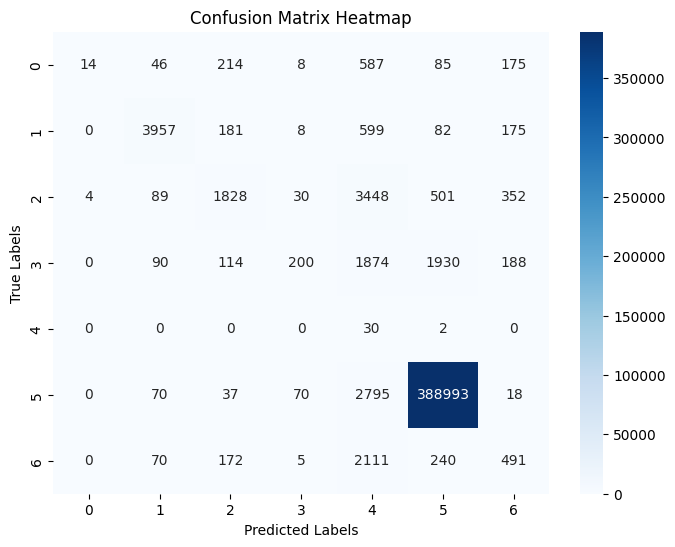

In [78]:
# Multi-class classification model training and Evaluation metrics using SMOTE resampling technique and PCA

importances, test_preds = random_forest_model(X_train_pca, y_train, X_test_pca, y_test, 'mc_model.pkl')

In [79]:
# Displaying the first 25 predictions and actual values for multi-class classification

print(test_preds[:25], "👈👈Predicted")
print(np.array(y_test[:25]), "👈👈Actual")

['Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Malware' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic'] 👈👈Predicted
['Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Exploits' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic' 'Normal Traffic' 'Normal Traffic' 'Normal Traffic'
 'Normal Traffic'] 👈👈Actual


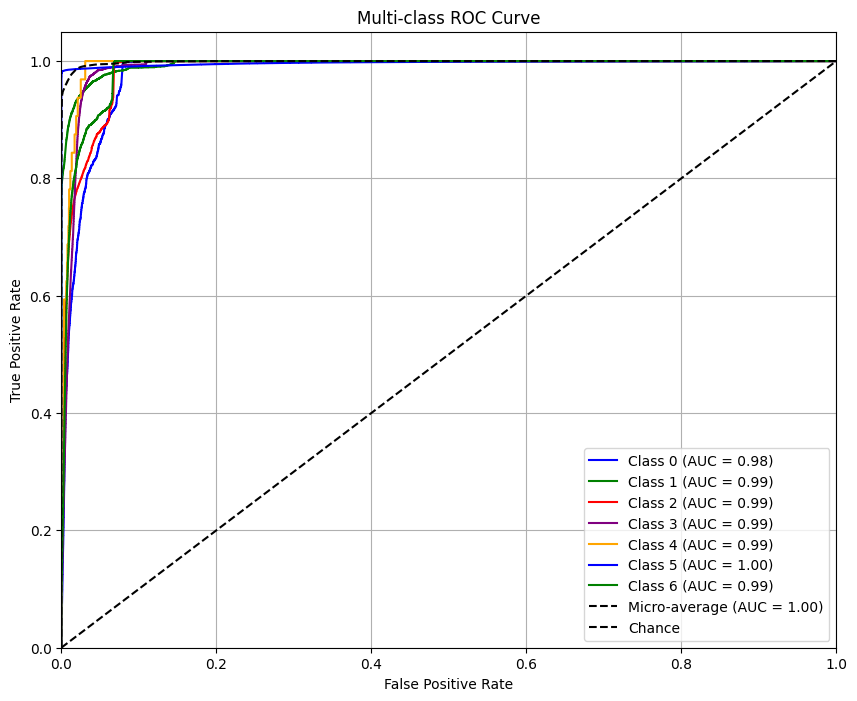

In [ ]:
# 1. One-hot encode the true labels

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# 2. Get predicted probabilities
y_score = joblib.load('rf_multi.pkl').predict_proba(X_test_pca)  # shape: (n_samples, n_classes)

# 3. Compute ROC curve and AUC for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# 4. Compute micro-average and macro-average ROC

# Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC AUC
roc_auc["macro"] = roc_auc_score(y_test_bin, y_score, average="macro")


# 5. Plot the ROC curves
plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Add micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         color='black', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

DNN for Binary And Multi-class Classification

In [265]:
def DNN(output_dims, output_act, hl1, hl2, hl3, hl4, hl5):
    input_dims = 25
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hl1, input_shape=(input_dims,), activation="relu"),
        tf.keras.layers.Dense(hl2, activation="relu"),
        tf.keras.layers.Dense(hl3, activation="relu"),
        tf.keras.layers.Dense(hl4, activation="relu"),
        tf.keras.layers.Dense(hl5, activation="relu"),
        tf.keras.layers.Dense(output_dims, activation=output_act)
    ])

    model.summary()

    return model

In [266]:
early_stopping = EarlyStopping(
    monitor='val_loss',      # or 'val_accuracy', depending on your goal
    patience=5,              # number of epochs with no improvement before stopping
    restore_best_weights=True # restore model weights from the epoch with the best value of the monitored quantity
)

In [267]:
def model_fit(model, X_train, y_train, X_test, y_test, epochs):
    result = model.fit(X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       epochs=epochs,
                       callbacks=[early_stopping]) # Add callbacks, batch_size
    
    return result

Binary-class Classification

In [268]:
act = "sigmoid"
output_dims = 1
hl1, hl2, hl3, hl4, hl5 = 25, 20, 16, 8, 16
dnn = DNN(output_dims, act, hl1, hl2, hl3, hl4, hl5)
dnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

le = LabelEncoder()
z_train = le.fit_transform(z_train)
z_test = le.transform(z_test)

model_fit(dnn, X2_train_pca, z_train, X2_test_pca, z_test, 5)
dnn.evaluate(X2_test_pca, z_test)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,803 (7.04 KB)

 Trainable params: 1,803 (7.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 579s 6ms/step - accuracy: 0.9902 - loss: 0.0358 - val_accuracy: 0.9868 - val_loss: 0.0322
Epoch 2/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 192s 2ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9868 - val_loss: 0.0341
Epoch 3/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 195s 2ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9868 - val_loss: 0.0307
Epoch 4/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 198s 2ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9871 - val_loss: 0.0356
Epoch 5/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 235s 2ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9867 - val_loss: 0.0344
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9870 - loss: 0.0303


[0.03070593811571598, 0.9868336319923401]

In [269]:
predictions = dnn.predict(X2_test_pca)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 13s 974us/step


In [304]:
prediction = predictions.ravel().astype(int)

In [305]:
print([class_name[prediction[:25]]])
print([class_name[z_test[:25]]])

[array(['Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Attack', 'Attack', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic', 'Attack',
       'Normal Traffic', 'Attack'], dtype=object)]
[array(['Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Attack', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic'], dtype=obj

              precision    recall  f1-score   support

     Class 0       0.51      1.00      0.67     19900
     Class 1       1.00      0.95      0.97    391983

    accuracy                           0.95    411883
   macro avg       0.75      0.98      0.82    411883
weighted avg       0.98      0.95      0.96    411883



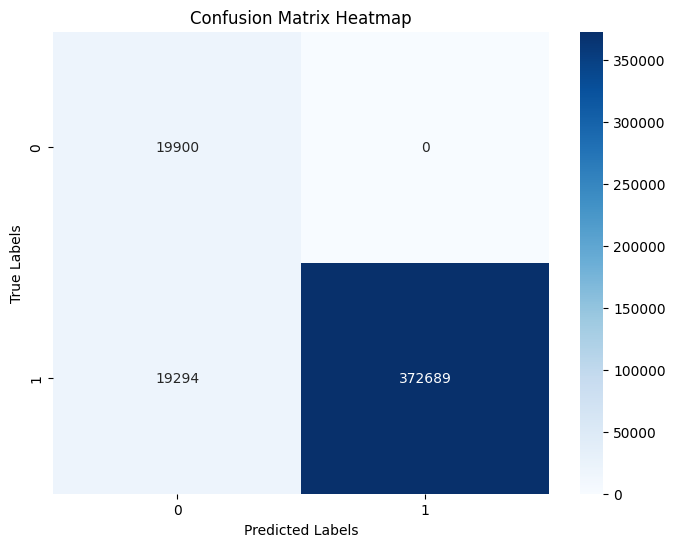

In [307]:
target_names = ["Class {}".format(i) for i in range(len(class_name))]
print(classification_report(z_test, prediction, target_names=target_names))

conf_matrix = confusion_matrix(z_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')#, xticklabels=target, yticklabels=target
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [276]:
dnn.save('dnn_binary.keras')

Multi-class Classification

In [282]:
act = "softmax"
output_dims = 7
hl1, hl2, hl3, hl4, hl5 = 25, 20, 16, 8, 16
dnn_mc = DNN(output_dims, act, hl1, hl2, hl3, hl4, hl5)
dnn_mc.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

history_mc = model_fit(dnn_mc, X_train_pca, y_train, X_test_pca, y_test, 5)
dnn_mc.evaluate(X_test_pca, y_test)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,905 (7.44 KB)

 Trainable params: 1,905 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 658s 3ms/step - accuracy: 0.8057 - loss: 0.4988 - val_accuracy: 0.9717 - val_loss: 0.0973
Epoch 2/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 703s 3ms/step - accuracy: 0.8349 - loss: 0.4189 - val_accuracy: 0.9726 - val_loss: 0.0927
Epoch 3/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 728s 3ms/step - accuracy: 0.8381 - loss: 0.4099 - val_accuracy: 0.9722 - val_loss: 0.0970
Epoch 4/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 1892s 7ms/step - accuracy: 0.8401 - loss: 0.4043 - val_accuracy: 0.9730 - val_loss: 0.0926
Epoch 5/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 2138s 8ms/step - accuracy: 0.8413 - loss: 0.4011 - val_accuracy: 0.9729 - val_loss: 0.0927
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 116s 9ms/step - accuracy: 0.9735 - loss: 0.0913


[0.09262613952159882, 0.9730093479156494]

In [283]:
predictions_mc = dnn_mc.predict(X_test_pca)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step


In [287]:
preds = []
for i in range(len(predictions_mc)):
    preds.append(int(np.argmax(predictions_mc[i])))

In [288]:
print([class_names[y_test[30:60]]])
print([class_names[preds[30:60]]])

[array(['Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'DoS/DDoS', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'DoS/DDoS', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic'], dtype=object)]
[array(['Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'DoS/DDoS', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'Normal Traffic', 'Normal Traffic',
       'Normal Traffic', 'DoS/DDoS', 'Normal Traffic', 'Normal Traf

              precision    recall  f1-score   support

     Class 0       0.17      0.67      0.27      1129
     Class 1       0.96      0.84      0.90      5002
     Class 2       0.83      0.60      0.69      6252
     Class 3       0.43      0.86      0.57      4396
     Class 4       0.07      0.66      0.13        32
     Class 5       1.00      0.98      0.99    391983
     Class 6       0.66      0.75      0.71      3089

    accuracy                           0.97    411883
   macro avg       0.59      0.77      0.61    411883
weighted avg       0.99      0.97      0.98    411883



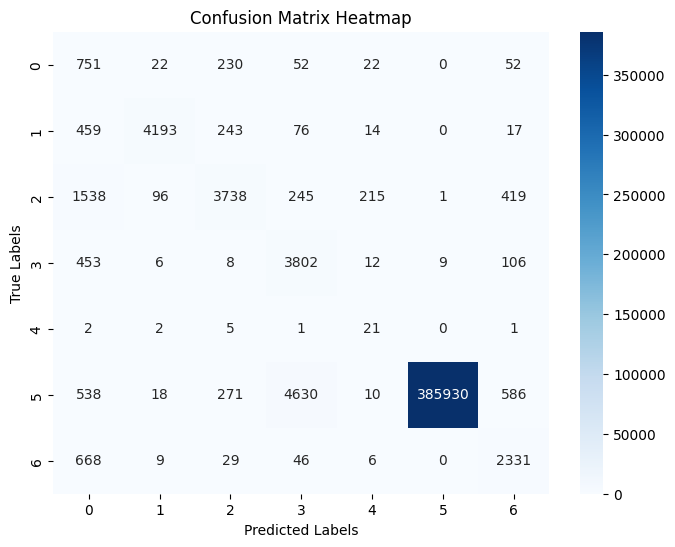

In [302]:
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_test, preds, target_names=target_names))

conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')#, xticklabels=target, yticklabels=target
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [294]:
model_mc.save('dnn_multi.keras')

CNN for Binary and Multi-class Claffication

Reshaping the dataset to feed it for CNN models

In [61]:
# Pad with one 0 to make it 38, which can be reshaped to 6x7
def reshape_to_image(X, h=6, w=7):
    padded = np.pad(X, ((0, 0), (0, h * w - X.shape[1])), 'constant')  # zero padding
    return padded.reshape(-1, h, w, 1)  # grayscale image shape

In [62]:
X_train_img = reshape_to_image(X_train_scaled, 6, 7)
X_test_img = reshape_to_image(X_test_scaled, 6, 7)

X_train_img.shape, X_test_img.shape, y_train.shape, y_test.shape

((8167787, 6, 7, 1), (411883, 6, 7, 1), (8167787,), (411883,))

In [235]:
class_names = np.unique(y)
class_idx = LabelEncoder().fit_transform(y)

In [64]:
X2_train_img = reshape_to_image(X2_train_scaled, 6, 7)
X2_test_img = reshape_to_image(X2_test_scaled, 6, 7)

X2_train_img.shape, X2_test_img.shape, z_train.shape, z_test.shape

((3135574, 6, 7, 1), (411883, 6, 7, 1), (3135574,), (411883,))

In [234]:
class_name = np.unique(z)
class_id = LabelEncoder().fit_transform(z)

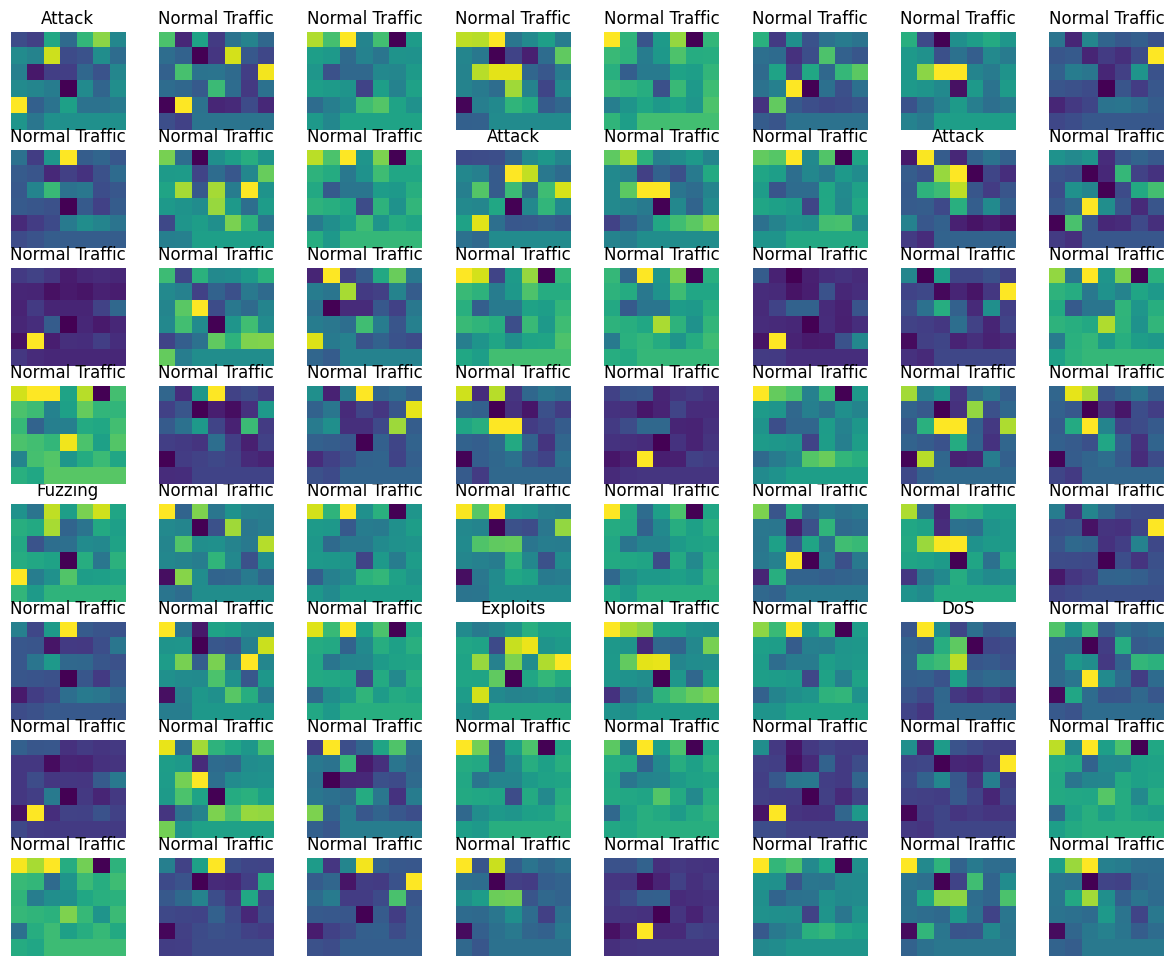

In [66]:
plt.figure(figsize=(15,12))
    
for i in range(2000, 2032):
    plt.subplot(8,8,i-2000+1)
    plt.imshow(X2_train_img[i])
    plt.axis('off')
    plt.title(class_name[class_id[i]])

    plt.subplot(8,8,i-2000+1+32)
    plt.imshow(X_train_img[i])
    plt.axis('off')
    plt.title(class_names[class_idx[i]])

In [67]:
def CNN(num_classes, act):

    # model = tf.keras.models.Sequential([
    #     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(6, 7, 1)),
    #     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    #     tf.keras.layers.Flatten(),
    #     tf.keras.layers.Dense(64, activation='relu'),
    #     tf.keras.layers.Dense(64, activation='relu'),
    #     tf.keras.layers.Dense(output_dims, activation=act),
    # ])

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(6, 7, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation=act)  # replace with binary output if needed
    ])

    return model

In [68]:
X2_train_img.shape, X2_test_img.shape, z_train.shape, z_test.shape

((3135574, 6, 7, 1), (411883, 6, 7, 1), (3135574,), (411883,))

In [69]:
X_train_img.shape, X_test_img.shape, y_train.shape, y_test.shape

((8167787, 6, 7, 1), (411883, 6, 7, 1), (8167787,), (411883,))

Binary-class Classification

In [70]:
act = "sigmoid"
output_dims = 1
model = CNN(output_dims, act)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

le = LabelEncoder()
z_train_t = le.fit_transform(z_train)
z_test_t = le.transform(z_test)

history = model_fit(model, X2_train_img, z_train_t, X2_test_img, z_test_t, 5)

Epoch 1/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 1302s 13ms/step - accuracy: 0.9909 - loss: 0.0351 - val_accuracy: 0.9870 - val_loss: 0.0347
Epoch 2/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 1174s 12ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9871 - val_loss: 0.0336
Epoch 3/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 1383s 14ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9870 - val_loss: 0.0390
Epoch 4/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 623s 6ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9881 - val_loss: 0.0278
Epoch 5/5
97987/97987 ━━━━━━━━━━━━━━━━━━━━ 311s 3ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9875 - val_loss: 0.0304


In [71]:
predictions = model.predict(X2_test_img)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step


In [72]:
predicted = predictions.ravel().astype(int)

In [237]:
# Print 100th Actual and Predicted classes for simple observation

print("Actual Label ========> Predicted Label\n")
for i in range(100):
    print(class_name[int(z_test[i])], "========>", class_name[int(predicted[i])])

Actual Label ========> Predicted Label

Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Attack
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Attack ========> Attack
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Attack
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Attack


In [74]:
test_loss, test_acc = model.evaluate(X2_test_img, z_test, verbose=2)

12872/12872 - 22s - 2ms/step - accuracy: 0.9881 - loss: 0.0278


In [75]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.027756962925195694
Test Accuracy: 0.9880766868591309


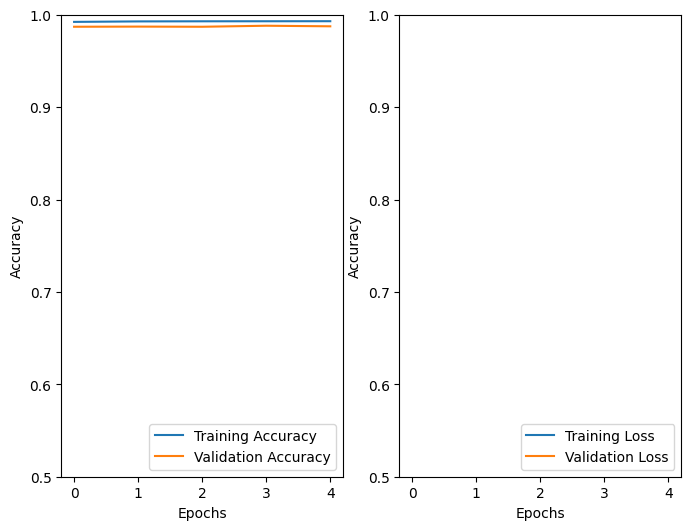

In [76]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

              precision    recall  f1-score   support

     Class 0       0.55      1.00      0.71     19900
     Class 1       1.00      0.96      0.98    391983

    accuracy                           0.96    411883
   macro avg       0.78      0.98      0.85    411883
weighted avg       0.98      0.96      0.97    411883



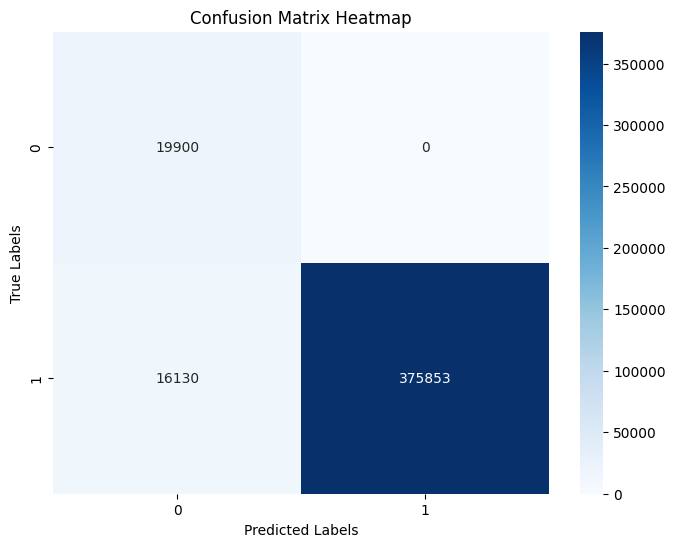

In [77]:
target_names = ["Class {}".format(i) for i in range(len(class_name))]
print(classification_report(z_test, predicted, target_names=target_names))

conf_matrix = confusion_matrix(z_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')#, xticklabels=target, yticklabels=target
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Found 395753 correct labels


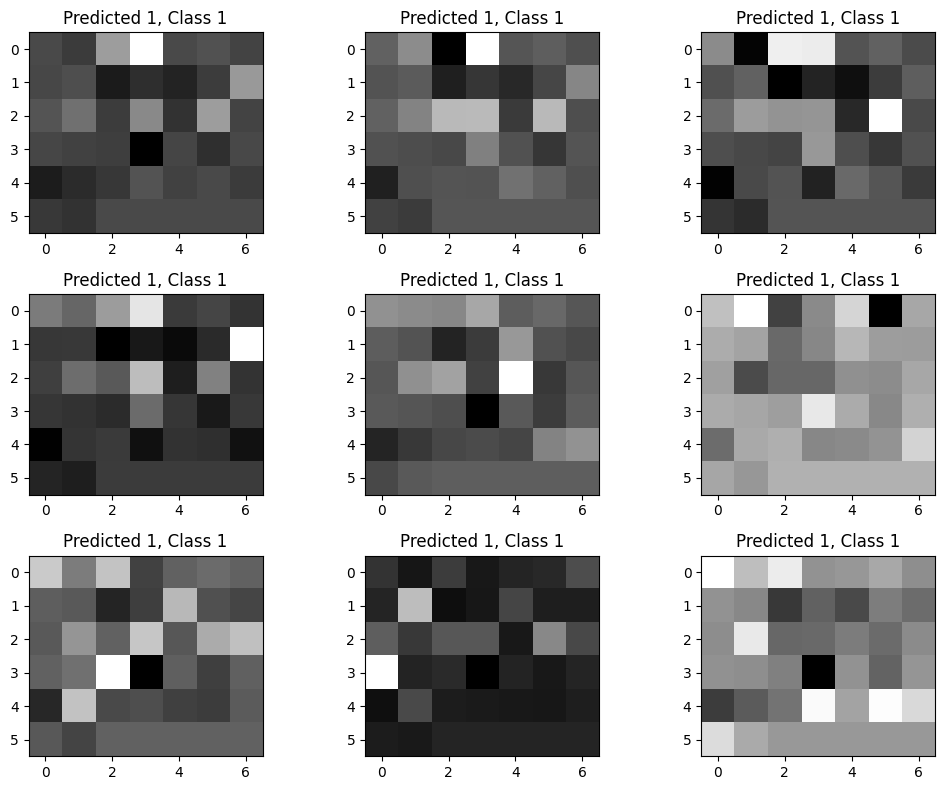

In [261]:
correct = np.where(predicted==z_test)[0]
incorrect = np.where(predicted!=z_test)[0]
print("Found %d correct labels" % len(correct))
print("Found %d incorrect labels" % len(incorrect))

plt.figure(figsize=(12,8))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X2_test_img[correct].reshape(6,7), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], z_test[correct]))
    plt.tight_layout()

Found 16130 incorrect labels


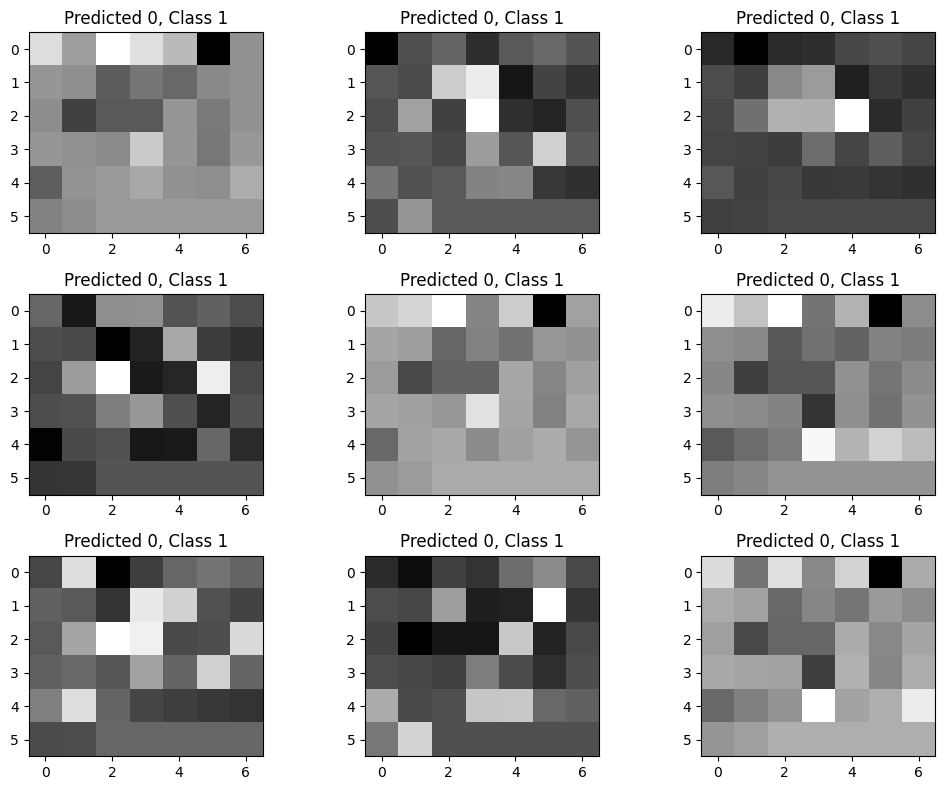

In [262]:

plt.figure(figsize=(12,8))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X2_test_img[incorrect].reshape(6,7), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], z_test[incorrect]))
    plt.tight_layout()

In [81]:
model.save('cnn_binary.keras')

Multi-Class Classification

In [85]:
act = "softmax"
output_dims = 7
model_mc = CNN(output_dims, act)
model_mc.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

le = LabelEncoder()
y_train_t = le.fit_transform(y_train)
y_test_t = le.transform(y_test)

history_mc = model_fit(model_mc, X_train_img, y_train_t, X_test_img, y_test_t, 5)

Epoch 1/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 945s 4ms/step - accuracy: 0.8135 - loss: 0.4802 - val_accuracy: 0.9746 - val_loss: 0.0785
Epoch 2/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 864s 3ms/step - accuracy: 0.8434 - loss: 0.3904 - val_accuracy: 0.9746 - val_loss: 0.0743
Epoch 3/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 1171s 5ms/step - accuracy: 0.8472 - loss: 0.3794 - val_accuracy: 0.9737 - val_loss: 0.0834
Epoch 4/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 1359s 5ms/step - accuracy: 0.8498 - loss: 0.3726 - val_accuracy: 0.9747 - val_loss: 0.0774
Epoch 5/5
255244/255244 ━━━━━━━━━━━━━━━━━━━━ 3698s 14ms/step - accuracy: 0.8513 - loss: 0.3687 - val_accuracy: 0.9748 - val_loss: 0.0810


In [86]:
predictions_mc = model_mc.predict(X_test_img)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step


In [113]:
predicted_values = []

for pred in range(len(predictions_mc)):
    predicted_values.append(int(np.argmax(predictions_mc[i])))

In [152]:
class_names = ['DoS', 'DoS/DDoS', 'Exploits', 'Fuzzing', 'Malware',
       'Normal Traffic', 'Reconnaissance']
class_name = ['Attack', 'Normal Traffic']

In [233]:
# Print 100th Actual and Predicted classes for simple observation

print("Actual Label ========> Predicted Label\n")
for i in range(100):
    print(class_names[y_test[i]], "========>", class_names[predicted_values[i]])

Actual Label ========> Predicted Label

Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Exploits ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal Traffic ========> Normal Traffic
Normal

In [89]:
test_loss_mc, test_acc_mc = model_mc.evaluate(X_test_img, y_test, verbose=2)

12872/12872 - 75s - 6ms/step - accuracy: 0.9746 - loss: 0.0743


In [90]:
print("Test Loss:", test_loss_mc)
print("Test Accuracy:", test_acc_mc)

Test Loss: 0.07427696883678436
Test Accuracy: 0.9745607376098633


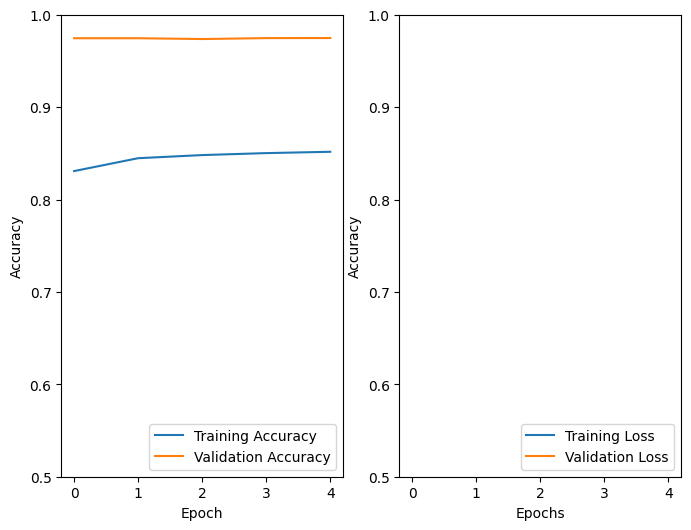

In [91]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history_mc.history['accuracy'], label='Training Accuracy')
plt.plot(history_mc.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      1129
     Class 1       0.00      0.00      0.00      5002
     Class 2       0.00      0.00      0.00      6252
     Class 3       0.00      0.00      0.00      4396
     Class 4       0.00      0.00      0.00        32
     Class 5       0.95      1.00      0.98    391983
     Class 6       0.00      0.00      0.00      3089

    accuracy                           0.95    411883
   macro avg       0.14      0.14      0.14    411883
weighted avg       0.91      0.95      0.93    411883



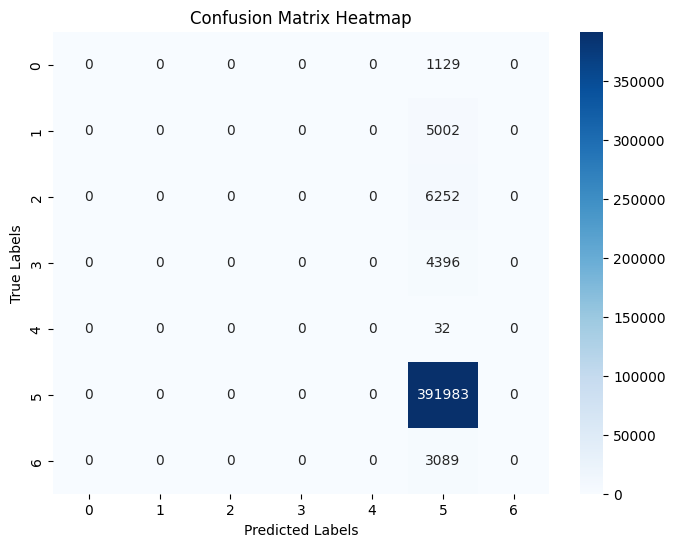

In [92]:
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_test, predicted_values, target_names=target_names))

conf_matrix = confusion_matrix(y_test, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')#, xticklabels=target, yticklabels=target
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Found 391983 correct labels
Found 19900 incorrect labels


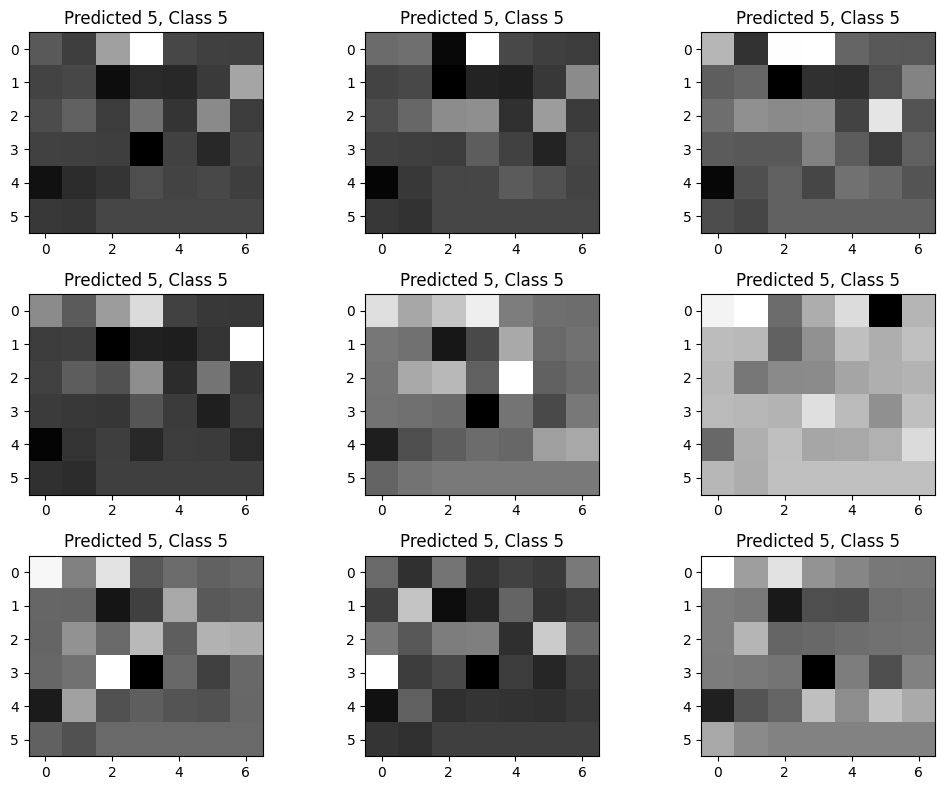

In [263]:
correct = np.where(predicted_values==y_test)[0]
incorrect = np.where(predicted_values!=y_test)[0]
print("Found %d correct labels" % len(correct))
print("Found %d incorrect labels" % len(incorrect))

plt.figure(figsize=(12,8))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_img[correct].reshape(6,7), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_values[correct], y_test[correct]))
    plt.tight_layout()

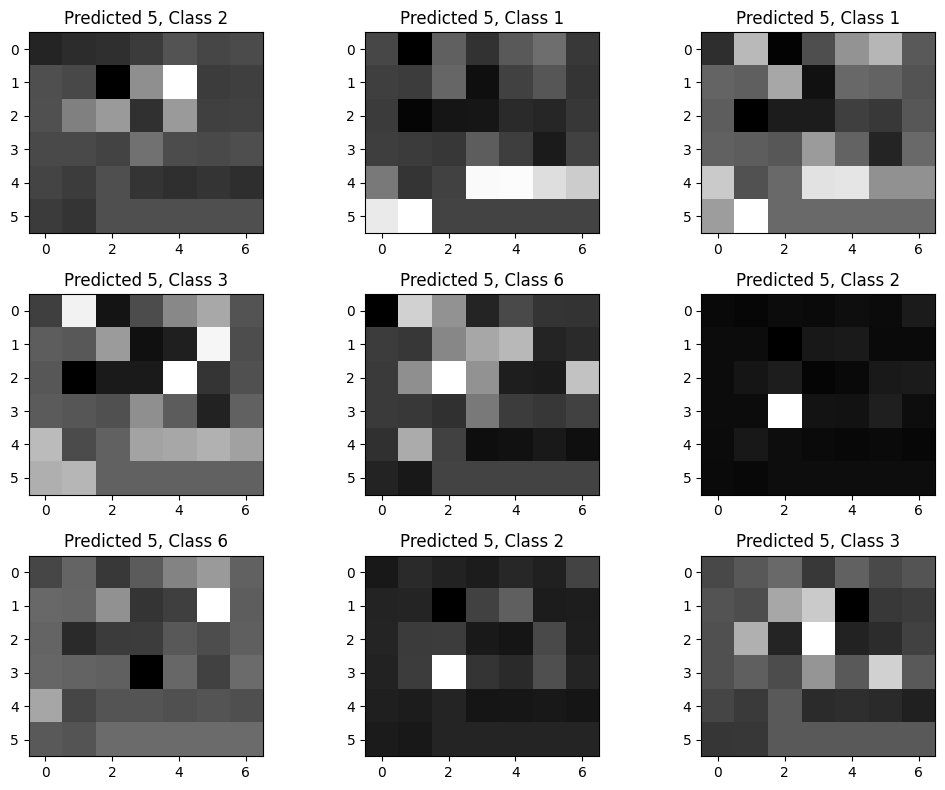

In [264]:
plt.figure(figsize=(12,8))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_img[incorrect].reshape(6,7), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_values[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [94]:
model_mc.save('cnn_multi.keras')

Autoencoder for Binary-class Classification

In [373]:
normal_features = normal_data.drop('Label', axis=1)
anomaly_features = anomaly_data.drop('Label', axis=1)

data.shape, normal_data.shape, anomaly_data.shape, normal_features.shape, anomaly_features.shape

((2540043, 49), (321283, 49), (2218760, 49), (321283, 48), (2218760, 48))

In [374]:
le = LabelEncoder()

# Loop through all object-type columns
for col in normal_features.select_dtypes(include='object').columns:
    # Fit on combined data to ensure consistency
    all_values = pd.concat([normal_features[col], anomaly_features[col]], axis=0)

    le.fit(all_values)

    normal_features[col] = le.transform(normal_features[col])
    anomaly_features[col] = le.transform(anomaly_features[col])

In [375]:
normal_train_data, normal_test_data = train_test_split(normal_features, test_size=0.25, random_state=42)
anomaly_train_data, anomaly_test_data = train_test_split(anomaly_features, test_size=0.25, random_state=42)

normal_train_data.shape, normal_test_data.shape, anomaly_train_data.shape, anomaly_test_data.shape

((240962, 48), (80321, 48), (1664070, 48), (554690, 48))

In [387]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(48,)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(48, activation='sigmoid'),
            layers.Reshape((48, ))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

In [397]:
def model_fit(x_train, x_test):
    latent_dimensions = 64
    autoencoder = SimpleAutoencoder(latent_dimensions)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
    

In [398]:
model_fit(normal_train_data, normal_test_data)
model_fit(anomaly_train_data, anomaly_test_data)

Epoch 1/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3580 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 2/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8340 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 3/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8345 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 4/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8351 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 5/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8336 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 6/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8345 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 7/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8334 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 8/10
942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8351 - loss: nan - val_accuracy: 0.8308 - val_loss: nan
Epoch 9/10
942/942 ━━━━━

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

ANN Model for Training purpose

In [430]:
# ANN for multi-class classification

# Label encoding and train/test split
le = LabelEncoder()
y = le.fit_transform(y)
Xdl_train, Xdl_test, ydl_train, ydl_test = train_test_split(dl, y, test_size=0.2, random_state=42)

In [431]:
# Standardization and scaling

scaler = StandardScaler()
Xdl_train_scaled = scaler.fit_transform(Xdl_train)
Xdl_test_scaled = scaler.transform(Xdl_test)

Xdl_train_scaled = pd.DataFrame(Xdl_train_scaled, columns=Xdl_train.columns)
Xdl_test_scaled = pd.DataFrame(Xdl_test_scaled, columns=Xdl_test.columns)
Xdl_train_scaled.shape, Xdl_test_scaled.shape

((1647530, 45), (411883, 45))

In [432]:
model1 = keras.Sequential([
    keras.Input(shape=(45,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(7, activation="softmax"),
])

In [433]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(Xdl_train_scaled, ydl_train, epochs=5)
model1.summary()
y_pred1 = model1.predict(Xdl_test_scaled)
y_pred1, ydl_test
model1.evaluate(Xdl_test_scaled, ydl_test)

Epoch 1/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - accuracy: 0.9694 - loss: 0.0901
Epoch 2/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - accuracy: 0.9778 - loss: 0.0542
Epoch 3/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.9789 - loss: 0.0513
Epoch 4/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step - accuracy: 0.9794 - loss: 0.0496
Epoch 5/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step - accuracy: 0.9798 - loss: 0.0485


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 20)                  │             920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 7)                   │              77 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,623 (14.16 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,416 (9.44 KB)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9801 - loss: 0.0469


[0.04752408713102341, 0.9798243641853333]

In [33]:
tf.config.experimental.list_physical_devices()
tf.test.is_built_with_cuda()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# ANN for binary-class classification

# with tf.device("/GPU:0"):  

# Label encoding and train/test split
le = LabelEncoder()
zdl = le.fit_transform(z)

X2dl_train, X2dl_test, zdl_train, zdl_test = train_test_split(dl, zdl, test_size=0.2, random_state=42)


# Standardization and scaling
scaler = StandardScaler()
X2dl_train_scaled = scaler.fit_transform(X2dl_train)
X2dl_test_scaled = scaler.transform(X2dl_test)

X2dl_train_scaled = pd.DataFrame(X2dl_train_scaled, columns=Xdl_train.columns)
X2dl_test_scaled = pd.DataFrame(X2dl_test_scaled, columns=Xdl_test.columns)
X2dl_train_scaled.shape, X2dl_test_scaled.shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(45,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X2dl_train_scaled, zdl_train, epochs=5)
model.summary()

Epoch 1/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 377s 7ms/step - accuracy: 0.9834 - loss: 0.0361
Epoch 2/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 402s 8ms/step - accuracy: 0.9895 - loss: 0.0203
Epoch 3/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 459s 9ms/step - accuracy: 0.9900 - loss: 0.0193
Epoch 4/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 220s 4ms/step - accuracy: 0.9902 - loss: 0.0191
Epoch 5/5
51486/51486 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.9902 - loss: 0.0189


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,425 (13.38 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,284 (8.93 KB)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 12s 908us/step
Accuracy: 0.0216614912487284
Accuracy: 0.9783385087512716
Accuracy: 0.022141100503522672
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9905 - loss: 0.0189


[0.01912890188395977, 0.990354061126709]

In [ ]:
y_pred = model.predict(X2dl_test_scaled)
y_pred = y_pred.ravel().astype(int)
print(y_pred)
print(zdl_test)

target_value = zdl_test == y_pred
true_value = []
false_value = []
for value in target_value:
    if value == True:
        true_value.append(value)
    else:
        false_value.append(value)
print(len(true_value))
print(len(false_value))
print(len(zdl_test))
                                      
print(f"Accuracy: {len(false_value)/len(zdl_test)}")
print(f"Accuracy: {len(true_value)/len(zdl_test)}")
print(f"Accuracy: {len(false_value)/len(true_value)}")
print(len(zdl_test) - len(false_value))
model.evaluate(X2dl_test_scaled, zdl_test)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 12s 923us/step
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
402961
8922
411883
Accuracy: 0.0216614912487284
Accuracy: 0.9783385087512716
Accuracy: 0.022141100503522672
402961
12872/12872 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9905 - loss: 0.0189


[0.01912890188395977, 0.990354061126709]

In [85]:
from tensorflow.keras.datasets import fashion_mnist

class AnomalyDetector(Model):
  def __init__(self):
      super(AnomalyDetector, self).__init__()
      self.encoder = tf.keras.Sequential([
          layers.Flatten(input_shape=(38,)),
          layers.Dense(38, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])
      self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(38, activation="sigmoid")])

  def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

autoencoder = AnomalyDetector()

In [90]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision'])
history = autoencoder.fit(X2_train_scaled, 
                          X2_train_scaled,
                          epochs=20,
                          batch_size=512,
                          validation_data=(X2_test_scaled, X2_test_scaled),
                          shuffle=True)

Epoch 1/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.0113 - loss: 0.0023 - precision: 0.0000e+00 - val_accuracy: 3.8846e-04 - val_loss: -0.4740 - val_precision: 0.0000e+00
Epoch 2/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0389 - loss: 0.0018 - precision: 0.0000e+00 - val_accuracy: 1.5538e-04 - val_loss: -0.4754 - val_precision: 0.0000e+00
Epoch 3/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0152 - loss: -2.5312e-04 - precision: 0.0000e+00 - val_accuracy: 1.5538e-04 - val_loss: -0.4771 - val_precision: 0.0000e+00
Epoch 4/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.0313 - loss: 2.4464e-04 - precision: 0.0000e+00 - val_accuracy: 3.8846e-04 - val_loss: -0.4762 - val_precision: 0.0000e+00
Epoch 5/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.0049 - loss: 0.0012 - precision: 0.0000e+00 - val_accuracy: 3.8846e-04 - val_loss: -0.4783 - val_precision: 0.0000e+00
Epoch 6/20
6125/6125 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/s

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

encoded_data = autoencoder.encoder(X2_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(X2_test_scaled[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], X2_test_scaled[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [95]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X2_train_scaled.shape[1]  # 38

# ---- Encoder ----
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)  # Latent space

# ---- Decoder ----
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# ---- Autoencoder ----
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 38)             │         1,254 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,854 (15.05 KB)

 Trainable params: 3,854 (15.05 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
autoencoder.fit(X2_train_scaled, X2_train_scaled,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 95s 9ms/step - loss: 0.7813 - val_loss: 0.7980
Epoch 2/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 101s 10ms/step - loss: 0.6995 - val_loss: 0.7938
Epoch 3/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 117s 12ms/step - loss: 0.7092 - val_loss: 0.7930
Epoch 4/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - loss: 0.6915 - val_loss: 0.7907
Epoch 5/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 97s 10ms/step - loss: 0.6974 - val_loss: 0.7905
Epoch 6/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 100s 10ms/step - loss: 0.7560 - val_loss: 0.7902
Epoch 7/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 97s 10ms/step - loss: 0.6933 - val_loss: 0.7901
Epoch 8/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 97s 10ms/step - loss: 0.6869 - val_loss: 0.7900
Epoch 9/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 117s 12ms/step - loss: 0.7375 - val_loss: 0.7850
Epoch 10/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 110s 11ms/step - loss: 0.7210 - val_loss: 0.7847
Epoch 11/20
9799/9799 ━━━━━━━━━━━━━━━━━━━━ 91s 9ms/step - loss: 0.7020 - val_loss: 0.7848
Epoch

In [97]:
encoder = Model(inputs=input_layer, outputs=encoded)
X2_train_encoded = encoder.predict(X2_train_scaled)

97987/97987 ━━━━━━━━━━━━━━━━━━━━ 231s 2ms/step


In [104]:
autoencoder.predict(X2_test_scaled)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step


array([[9.99975383e-01, 5.95709775e-03, 9.99461055e-01, ...,
        2.93375895e-04, 2.74422996e-06, 1.21389808e-14],
       [9.99969423e-01, 9.28824961e-01, 4.44887428e-06, ...,
        1.79319736e-02, 1.00731762e-04, 4.73288553e-15],
       [9.99480605e-01, 1.33778231e-04, 9.99473989e-01, ...,
        4.80839371e-04, 2.07419271e-05, 7.09091466e-12],
       ...,
       [3.87865990e-01, 3.89677780e-06, 1.54128190e-06, ...,
        8.61985207e-01, 3.63241553e-01, 8.95686370e-09],
       [9.88392591e-01, 1.61401480e-02, 4.38399971e-01, ...,
        3.20863444e-04, 1.05963543e-10, 5.42113752e-19],
       [1.29038263e-02, 5.76343336e-06, 4.01104808e-01, ...,
        3.23714805e-04, 2.70327058e-04, 4.03399563e-13]], dtype=float32)

In [108]:
autoencoder.evaluate(X2_test_scaled, X2_test_scaled)

12872/12872 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 0.6944


0.6883564591407776

In [440]:
data_dir = 'C:/Users/admin/Documents/Intern/Deep Learning/CNN/Potato deases prediction'

In [441]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/admin/Documents/Intern/Deep Learning/CNN/Potato deases prediction')

In [448]:
leaf_len = len(list(data_dir.glob("*/*/*.jpg")))
print("Number of .jpg format leaf in the directory", leaf_len)

Number of .jpg format leaf in the directory 2152


Simple Autoencoder

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

input_dim = X.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

In [ ]:
# Calculate Reconstruction Error and Visualize Error Distribution

from sklearn.metrics import mean_squared_error

# Reconstruct the input using the autoencoder
X_pred = autoencoder.predict(X)

# Calculate reconstruction error for each instance
mse = np.mean(np.power(X - X_pred, 2), axis=1)

# import matplotlib.pyplot as plt
# import seaborn as sns

sns.histplot(mse, bins=50, kde=True)
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.show()

In [ ]:
threshold = np.percentile(mse, 95)  # Example: top 5% as anomalies
anomalies = mse > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")

label_encoder = LabelEncoder()
z_encoded = label_encoder.fit_transform(z)
y_pred = (mse > threshold).astype(int)
print(classification_report(z_encoded, y_pred))

In [ ]:
# 📥 Load and Preprocess the MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 🔁 Normalize pixel values (0–1) and reshape for Conv2D
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

# 🧠 Define the Autoencoder Architecture
input_img = layers.Input(shape=(28, 28, 1))  # Input layer

# 🔽 Encoder (compresses the image)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # Compressed representation (7x7x8)

# 🔼 Decoder (reconstructs the image)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# ⚙️ Compile the Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# 🚀 Train the Autoencoder
history = autoencoder.fit(
    X_train, X_train,  # Input = Target (self-supervised)
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_split=0.1
)

# 🔍 Predict and Visualize Reconstruction
decoded_imgs = autoencoder.predict(X_test[:10])

# 🎨 Plot Original and Reconstructed Images
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# 💾 Save the model
autoencoder.save("autoencoder_mnist_model.h5")

In [ ]:
threshold = np.percentile(mse, 95)  # Example: top 5% as anomalies
anomalies = mse > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")

label_encoder = LabelEncoder()
z_encoded = label_encoder.fit_transform(z)
y_pred = (mse > threshold).astype(int)
print(classification_report(z_encoded, y_pred))

In [ ]:
data = tf.keras.datasets.mnist.load_data()
data.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#  Display the First 12 Training Images
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# 🔧 1. Build the Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

'''🔹 Sequential([ ... ])
This builds a linear stack of layers, where each layer passes its output to the next one.

🔹 Flatten(input_shape=(28, 28))
Converts each 28×28 image into a 1D vector of 784 values (28 × 28 = 784).
Input shape is only specified on the first layer.

🔹 Dense(128, activation='relu')
A fully connected layer with 128 neurons.
Each of the 784 input values is connected to each of the 128 neurons (with individual weights).

ReLU (Rectified Linear Unit) is a non-linear activation function that replaces negative values with 0.
Helps introduce non-linearity so the network can learn complex patterns.

🔹 Dense(10, activation='softmax')
Output layer with 10 neurons, one for each digit class (0–9).

softmax converts raw scores (logits) into probabilities that sum to 1 — making it suitable for multi-class classification.'''

# ⚙️ 2. Compile the Model
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()]
)

'''optimizer=Adam():
Adam is an adaptive optimizer that updates weights to minimize loss during training.

loss=SparseCategoricalCrossentropy():
Measures the difference between predicted class probabilities and actual labels (used for integer-labeled multi-class classification).

metrics=[SparseCategoricalAccuracy()]:
Evaluates model accuracy during training and testing by checking how many predictions matched the true class.
'''

# 🏋️‍♂️ 3. Train the Model
model.fit(x_train, y_train, epochs=5)

'''Trains the model on the training data for 5 full passes (epochs) over the dataset.
During each epoch:
    The model performs forward propagation → computes predictions.
    Then backpropagation → updates weights to reduce the loss.'''

# 🧪 4. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

'''Evaluates the trained model on unseen test data.
Returns the loss and accuracy.
print(f'\nTest accuracy: {test_acc}') outputs the result.'''

# 🧠 Summary:
'''This model is a Feedforward Neural Network (FNN) trained to recognize handwritten digits (0–9) using:
Flattening the input image.
1 hidden layer with ReLU (128 neurons).
Output layer with Softmax (10 neurons).
Optimized using Adam with cross-entropy loss.'''

In [ ]:
import matplotlib.animation as animation
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

# Simulate a digit image and layer activations
np.random.seed(42)
sample_image = np.random.rand(28, 28)
hidden_activations = np.random.rand(128)
output_activations = np.random.rand(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Generate neuron positions
input_pos = [(0.5 + (i % 7) * 0.5, 9 - (i // 7) * 0.5) for i in range(28*28)]
hidden_pos = [(4 + (i % 16) * 0.25, 9 - (i // 16) * 0.5) for i in range(128)]
output_pos = [(10, 9 - i) for i in range(10)]

# Store artist objects
input_neurons = []
hidden_neurons = []
output_neurons = []
input_to_hidden_lines = []
hidden_to_output_lines = []
loss_text = None

# Initialize frame
def init():
    global loss_text
    ax.clear()
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Draw hidden layer neurons
    for (x, y) in hidden_pos:
        neuron = Circle((x, y), 0.08, fc='lightgray')
        ax.add_patch(neuron)
        hidden_neurons.append(neuron)

    # Draw output layer neurons
    for (x, y) in output_pos:
        neuron = Circle((x, y), 0.15, fc='lightgray')
        ax.add_patch(neuron)
        output_neurons.append(neuron)

    # Draw connection lines (hidden -> output)
    for i, (hx, hy) in enumerate(hidden_pos):
        for j, (ox, oy) in enumerate(output_pos):
            line = Line2D([hx, ox], [hy, oy], color='gray', alpha=0.1)
            ax.add_line(line)
            hidden_to_output_lines.append(line)

    # Loss text
    loss_text = ax.text(5, 0.5, '', fontsize=14)

    return hidden_neurons + output_neurons + hidden_to_output_lines + [loss_text]

# Frame update
def update(frame):
    # Simulate activations over time
    hidden_act = np.tanh(hidden_activations * (frame + 1) / 10)
    output_raw = np.exp(output_activations * (frame + 1) / 10)
    output_act = output_raw / np.sum(output_raw)
    predicted = np.argmax(output_act)
    true_label = 3  # Example true label
    loss = -np.log(output_act[true_label])

    # Update hidden layer neuron colors
    for i, act in enumerate(hidden_act):
        color = (1 - act, 1 - act, 1)
        hidden_neurons[i].set_facecolor(color)

    # Update output layer neuron colors
    for i, act in enumerate(output_act):
        color = (1 - act, 1 - act, 1)
        output_neurons[i].set_facecolor(color)

    # Update connection line alpha (stronger color for stronger output)
    for i, line in enumerate(hidden_to_output_lines):
        j = i % 10
        line.set_alpha(output_act[j] * 0.5)

    # Show prediction and loss
    loss_text.set_text(f"Prediction: {predicted} | True: {true_label} | Loss: {loss:.4f}")

    return hidden_neurons + output_neurons + hidden_to_output_lines + [loss_text]

ani = animation.FuncAnimation(fig, update, frames=20, init_func=init, blit=True, interval=500, repeat=False)
plt.close(fig)
ani

In [ ]:
# ani.save("mnist_forward_pass.mp4", writer='ffmpeg', fps=2)
ani.save("model_processing_simulation.mp4", writer='ffmpeg', fps=2) # for .mp4 video formats
ani.save("model_processing_simulation.gif", writer='pillow', fps=2) # pillow for .gif format

In [ ]:
# Rohitash Chandra, 2017 c.rohitash@gmail.conm
#https://github.com/rohitash-chandra
# ref: http://iamtrask.github.io/2015/07/12/basic-python-network/  
#Sigmoid units used in hidden and output  
# Numpy used: http://cs231n.github.io/python-numpy-tutorial/#numpy-arrays

import matplotlib.pyplot as plt
import numpy as np 
import random
import time
 
class Network:
	def __init__(self, Topo, Train, Test, MaxTime, Samples, MinPer, learnRate): 
		self.Top  = Topo  # NN topology [input, hidden, output]
		self.Max = MaxTime # max epocs
		self.TrainData = Train
		self.TestData = Test
		self.NumSamples = Samples

		self.learn_rate  = learnRate
		self.minPerf = MinPer
		
		#initialize weights ( W1 W2 ) and bias ( b1 b2 ) of the network
		np.random.seed() 
		self.W1 = np.random.uniform(-0.5, 0.5, (self.Top[0] , self.Top[1]))  
		#print(self.W1,  ' self.W1')
		self.B1 = np.random.uniform(-0.5,0.5, self.Top[1])  # bias first layer
		#print(self.B1, ' self.B1')
		self.BestB1 = self.B1
		self.BestW1 = self.W1 
		self.W2 = np.random.uniform(-0.5, 0.5, (self.Top[1] , self.Top[2]))   
		self.B2 = np.random.uniform(-0.5,0.5, self.Top[2])  # bias second layer
		self.BestB2 = self.B2
		self.BestW2 = self.W2 
		self.hidout = np.zeros(self.Top[1] ) # output of first hidden layer
		self.out = np.zeros(self.Top[2]) #  output last layer

		self.hid_delta = np.zeros(self.Top[1] ) # output of first hidden layer
		self.out_delta = np.zeros(self.Top[2]) #  output last layer

	def sigmoid(self,x):
		return 1 / (1 + np.exp(-x))
	 
	def sampleEr(self,actualout):
		error = np.subtract(self.out, actualout)
		sqerror= np.sum(np.square(error))/self.Top[2] 
		 
		return sqerror

	def ForwardPass_Simple(self, input_vec ):  # Alternative implementation of ForwardPass(self, X )
		layer = 0 # input to hidden layer
		weightsum_first = 0

		for y in range(0, self.Top[layer+1]):
			for x in range(0, self.Top[layer]): 
				weightsum_first   +=   input_vec[x] * self.W1[x,y] 
			self.hidout[y] = self.sigmoid(weightsum_first - self.B1[y])
			weightsum_first  = 0 

		layer = 1 #   hidden layer to output
		weightsum_second = 0 # output of second layer (class outputs)
		for y in range(0, self.Top[layer+1]):
			for x in range(0, self.Top[layer]):
				weightsum_second  +=   self.hidout[x] * self.W2[x,y]
			self.out[y] = self.sigmoid(weightsum_second - self.B2[y])
			weightsum_second = 0 

	def BackwardPass_Simple(self, input_vec, desired ):  # Alternative implementation of BackwardPass(self, Input, desired)

		# compute gradients for each layer (output and hidden layer)

		layer = 2 #output layer
		for x in range(0, self.Top[layer]):
			self.out_delta[x] =  (desired[x] - self.out[x])*(self.out[x]*(1-self.out[x]))

		layer = 1 # hidden layer
		temp = 0
		for x in range(0, self.Top[layer]):
			for y in range(0, self.Top[layer+1]):
				temp += ( self.out_delta[y] * self.W2[x,y]);
			self.hid_delta[x] =  (self.hidout[x] * (1 - self.hidout[x])) * temp
			temp = 0

				# update weights and bias
		layer = 1 # hidden to output

		for x in range(0, self.Top[layer]):
			for y in range(0, self.Top[layer+1]):
				self.W2[x,y] += self.learn_rate * self.out_delta[y] * self.hidout[x]
			#print self.W2
		for y in range(0, self.Top[layer+1]):
			self.B2[y] += -1 * self.learn_rate * self.out_delta[y]

		layer = 0 # Input to Hidden

		for x in range(0, self.Top[layer]):
			for y in range(0, self.Top[layer+1]):
				self.W1[x,y] += self.learn_rate * self.hid_delta[y] * input_vec[x]

		for y in range(0, self.Top[layer+1]):
			self.B1[y] += -1 * self.learn_rate * self.hid_delta[y]
			 
	def TestNetwork(self, Data, testSize, erTolerance):
		Input = np.zeros((1, self.Top[0])) # temp hold input
		Desired = np.zeros((1, self.Top[2])) 
		nOutput = np.zeros((1, self.Top[2]))
		clasPerf = 0
		sse = 0  
		self.W1 = self.BestW1
		self.W2 = self.BestW2 #load best knowledge
		self.B1 = self.BestB1
		self.B2 = self.BestB2 #load best knowledge
 
		for s in range(0, testSize):
							
			Input  =   Data[s,0:self.Top[0]] 
			Desired =  Data[s,self.Top[0]:] 

			self.ForwardPass_Simple(Input ) 
			sse = sse+ self.sampleEr(Desired)  

			if(np.isclose(self.out, Desired, atol=erTolerance).any()):
				clasPerf =  clasPerf +1  

		return ( sse/testSize, float(clasPerf)/testSize * 100 )

	def saveKnowledge(self):
		self.BestW1 = self.W1
		self.BestW2 = self.W2
		self.BestB1 = self.B1
		self.BestB2 = self.B2  

	def BP_GD(self):  
		Er = [] 
		epoch = 0
		bestmse = 10000 # assign a large number in begining to maintain best (lowest RMSE)
		bestTrain = 0
		while  epoch < self.Max and bestTrain < self.minPerf :
			sse = 0
			for s in range(0, self.NumSamples):
				Input  =  self.TrainData[s,0:self.Top[0]]  
				Desired  = self.TrainData[s,self.Top[0]:]  
				self.ForwardPass_Simple(Input)  
				self.BackwardPass_Simple(Input ,Desired)
				sse = sse+ self.sampleEr(Desired)
			 
			mse = np.sqrt(sse/self.NumSamples*self.Top[2])

			if mse < bestmse:
				bestmse = mse
				self.saveKnowledge() 
				(x,bestTrain) = self.TestNetwork(self.TrainData, self.NumSamples, 0.2)

			Er = np.append(Er, mse)
			
			epoch=epoch+1  

		return (Er,bestmse, bestTrain, epoch) 

def normalisedata(data, inputsize, outsize): # normalise the data between [0,1]
	traindt = data[:,np.array(range(0,inputsize))]	
	dt = np.amax(traindt, axis=0)
	tds = abs(traindt/dt) 
	return np.concatenate(( tds[:,range(0,inputsize)], data[:,range(inputsize,inputsize+outsize)]), axis=1)

def main(): 			
	problem = 2 # [1,2,3] choose your problem (Iris classfication or 4-bit parity or XOR gate)	

	if problem == 1:
		TrDat  = np.loadtxt("train.csv", delimiter=',') #  Iris classification problem (UCI dataset)
		TesDat  = np.loadtxt("test.csv", delimiter=',') #  
		Hidden = 6
		Input = 4
		Output = 2 #https://stats.stackexchange.com/questions/207049/neural-network-for-binary-classification-use-1-or-2-output-neurons
		TrSamples =  TrDat.shape[0]
		TestSize = TesDat.shape[0]
		learnRate = 0.1  
		TrainData  = normalisedata(TrDat, Input, Output) 
		TestData  = normalisedata(TesDat, Input, Output)
		MaxTime = 1000

	elif problem == 2:
		TrainData = np.loadtxt("4bit.csv", delimiter=',') #  4-bit parity problem
		TestData = np.loadtxt("4bit.csv", delimiter=',') #  
		Hidden = 6
		Input = 4
		Output = 1 #  https://stats.stackexchange.com/questions/207049/neural-network-for-binary-classification-use-1-or-2-output-neurons
		TrSamples =  TrainData.shape[0]
		TestSize = TestData.shape[0]
		learnRate = 0.9
		MaxTime = 5000

	elif problem == 3:
		TrainData = np.loadtxt("xor.csv", delimiter=',') #  XOR  problem
		TestData = np.loadtxt("xor.csv", delimiter=',') #  
		Hidden = 3
		Input = 2
		Output = 2  # one hot encoding: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
		TrSamples =  TrainData.shape[0]
		TestSize = TestData.shape[0]
		learnRate = 0.5
		MaxTime = 500 
 

	Topo = [Input, Hidden, Output] 
	MaxRun = 3 # number of experimental runs 
	 
	MinCriteria = 95 #stop when learn 95 percent

	trainTolerance = 0.2 # [eg 0.15 would be seen as 0] [ 0.81 would be seen as 1]
	testTolerance = 0.49
 

	trainPerf = np.zeros(MaxRun)
	testPerf =  np.zeros(MaxRun)

	trainMSE =  np.zeros(MaxRun)
	testMSE =  np.zeros(MaxRun)
	Epochs =  np.zeros(MaxRun)
	Time =  np.zeros(MaxRun)

	for run in range(0, MaxRun  ):
		print(run, ' is experimental run') 

		fnn = Network(Topo, TrainData, TestData, MaxTime, TrSamples, MinCriteria, learnRate)
		start_time=time.time()
		(erEp,  trainMSE[run] , trainPerf[run] , Epochs[run]) = fnn.BP_GD()   

		Time[run]  =time.time()-start_time
		(testMSE[run], testPerf[run]) = fnn.TestNetwork(TestData, TestSize, testTolerance)
	print(' print classification performance for each experimental run') 
	print(trainPerf)
	print(testPerf)
	print(' print RMSE performance for each experimental run') 
	print(trainMSE)
	print(testMSE)
	print(' print Epocs and Time taken for each experimental run') 
	print(Epochs)
	print(Time)
	print(' print mean and std of training performance') 
	print(np.mean(trainPerf), np.std(trainPerf))
	print(np.mean(testPerf), np.std(testPerf))
	print(' print mean and std of computational time taken') 	
	print(np.mean(Time), np.std(Time))
	
				 
	plt.figure()
	plt.plot(erEp )
	plt.ylabel('error')  
	plt.savefig('out.png')
			 
 
if __name__ == "__main__": main()